# Setup

In [10]:
# Import libraries and settings for analysis
# import pkg_resources
# pkg_resources.require("numpy==1.19.5") 
# pkg_resources.require("pandas==0.25.3")


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.options.display.float_format = "{:.2f}".format

In [11]:
# Import Libraries
import os
import subprocess
import numpy as np
import pandas as pd

In [12]:
# %pip install tables

In [4]:
np.__version__

'1.19.5'

In [4]:
# %pip uninstall numpy
# %pip install -Iv numpy==1.19.0 pandas==0.25.3

In [1]:
# %pip uninstall numpy -y
# %pip install numpy==1.19.0

In [2]:
# %pip freeze

In [8]:
# items in bucket
# This code lists objects in your Google Bucket

def list_items():
    # Get the bucket name
    my_bucket = os.getenv('WORKSPACE_BUCKET')

    # List objects in the bucket
    print(subprocess.check_output(f"gsutil ls -r {my_bucket}", shell=True).decode('utf-8'))

# list_items()


In [13]:
# Define import_df function
def import_df(filename):
    try:
        import_df_hdf(filename)
    except:
        print("h5 file not found")
        # Replace 'test.csv' with THE NAME of the file you're going to download from the bucket (don't delete the quotation marks)
        name_of_file_in_bucket = f'{filename}.csv'

        # get the bucket name
        my_bucket = os.getenv('WORKSPACE_BUCKET')

        # copy csv file from the bucket to the current working space
        os.system(f"gsutil cp '{my_bucket}/data/{name_of_file_in_bucket}' .")

        print(f'[INFO] {name_of_file_in_bucket} is successfully downloaded into your working space')
        # save dataframe in a csv file in the same workspace as the notebook
        temp_df = pd.read_csv(name_of_file_in_bucket, dtype=object)
        globals()[filename] = temp_df


In [14]:
# Define import_df function
def import_df_hdf(filename):
    # Replace 'test.csv' with THE NAME of the file you're going to download from the bucket (don't delete the quotation marks)
    name_of_file_in_bucket = f'{filename}.h5'
    
    # get the bucket name
    my_bucket = os.getenv('WORKSPACE_BUCKET')

    # copy csv file from the bucket to the current working space
    os.system(f"gsutil cp '{my_bucket}/data/{name_of_file_in_bucket}' .")

    print(f'[INFO] {name_of_file_in_bucket} is successfully downloaded into your working space')
    # save dataframe in a csv file in the same workspace as the notebook
    temp_df = pd.read_hdf(name_of_file_in_bucket, dtype=object)
    globals()[filename] = temp_df


In [15]:
# Define function to create color palettes

def create_color_palette(*args):
    if len(args) == 1:
        assert args[0] > 0
        return sns.color_palette('Blues_d', args[0] )
    elif len(args) == 2:
        high, low = args[0], args[1]
        assert high >= low
        return sns.color_palette('Blues_d', math.ceil((high - low) * 1.45) )
    elif len(args) == 3:
        high, low, mult = args[0], args[1], args[2]
        assert high >= low
        return sns.color_palette('Blues_d', math.ceil((high - low) * mult) )
    else:
        raise Exception("wrong amount of params")
        


In [16]:
# change columns to dates
def change_cols_to_date(dfs, cols):
    for df in dfs:
        df[cols] = df[cols].apply(pd.to_datetime)

In [17]:
# change columns to int
def change_cols_to_int(dfs, cols):
    for df in dfs:
        df[cols] = df[cols].astype(int)

In [18]:
# change columns with ids to int to string
def change_ids_to_str(dfs, cols):
    for df in dfs:
        df[cols] = df[cols].astype(str)

In [19]:
# move row of index to top of df
def move_row_to_top(df, index_name):
    df["new"] = range(1,len(df)+1)
    df.loc[index_name,'new'] = 0
    return df.sort_values("new").drop('new', axis=1)

In [20]:
#%%script false --no-raise-error

In [21]:
# Set cohort sizes here to account for missing
cohort_sizes = {
    "influenza" : 15346,
    "hepB": 6323,
    "hpv": 2125,
    "pneumococcal(<65)": 15217,
    "pneumococcal(>=65)": 15100,
    "all": 315297
}
cohort_sizes_series = pd.Series([15346, 6323, 2125, 15217, 15100, 315297], 
                                index=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"])

def account_for_missing(df, total_row_name='count', output_row_name="missing" ):
    diff = cohort_sizes_series.subtract(df.loc[total_row_name].astype(int)).fillna(0)
#     if (diff.sum() > 0):
    df.loc[output_row_name] = diff
#         df = move_row_to_top(df, 'Missing')
    return df

def add_cohort_size_row(df):
    print("HERE")
    display(df.head(3))
    df.loc["Cohort Size"] = cohort_sizes_series
    df = move_row_to_top(df, 'Cohort Size')
    return df

In [22]:
# create download links
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [23]:
# Create histograms for age in 2018
cohort_colors = {
    "influenza": "#d46868",
    "hepB": "#eda853",
    "hpv": "#71bf88",
    "pneumococcal(<65)": "#6198cf",
    "pneumococcal(>=65)": "#826cd9",
    "all": "#d96cce"
}
cohort_colors_list = list(cohort_colors.values())

In [24]:
sns.set_palette(sns.color_palette(cohort_colors_list))

# Demographics

## Import Datasets

In [21]:
import_df("influenza_demographics")
import_df("hepB_demographics")
import_df("hpv_demographics")
import_df("pneumococcal_demographics_under_65")
import_df("pneumococcal_demographics_65_and_over")
import_df("all_patients_demographics")

[INFO] influenza_demographics.h5 is successfully downloaded into your working space
[INFO] hepB_demographics.h5 is successfully downloaded into your working space
[INFO] hpv_demographics.h5 is successfully downloaded into your working space
[INFO] pneumococcal_demographics_under_65.h5 is successfully downloaded into your working space
[INFO] pneumococcal_demographics_65_and_over.h5 is successfully downloaded into your working space
[INFO] all_patients_demographics.h5 is successfully downloaded into your working space


In [22]:
# Prepare dataframes for visualization
demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                   pneumococcal_demographics_65_and_over, all_patients_demographics]
vac_demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                            pneumococcal_demographics_65_and_over]
demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
vac_demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)"]

change_cols_to_int(vac_demographic_dfs, ["age_at_vaccination"])
change_cols_to_int(demographic_dfs, ["age_in_2018"])

In [5]:
# hpv_demographics

In [6]:
# hpv_demographics[hpv_demographics['age_at_vaccination'] > 26]

## Analysis

In [28]:
# Prepare dataframes for visualization
demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                   pneumococcal_demographics_65_and_over, all_patients_demographics]
vac_demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                            pneumococcal_demographics_65_and_over]
demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
vac_demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)"]

In [29]:
# Table for Pneumococcal Vaccine Types
# pneumococcal_demographics_under_65
# col_names = ['PCV13', 'PPSV23', "only_PPSV23"]
col_names = ['only_PCV13', 'only_PPSV23', "PCV13_and_PPSV23", "neither_PCV13_nor_PPSV23"]
pneumococcal_demographics_dfs = [pneumococcal_demographics_under_65, pneumococcal_demographics_65_and_over ]
pneumococcal_demographics_names = ["pneumococcal(<65)", "pneumococcal(>=65)"]
output_dfs = []

for i in range(len(pneumococcal_demographics_dfs)):
#     print(pneumococcal_demographics_dfs[i].PCV13.value_counts(sort=False))
#     print(pneumococcal_demographics_dfs[i].PPSV23.value_counts(sort=False))
#     print(pneumococcal_demographics_dfs[i].only_PPSV23.value_counts(sort=False))
    this_df = pneumococcal_demographics_dfs[i][col_names]
    this_df = this_df.apply(lambda x: x.value_counts(sort=False))
    this_df = this_df.T
#     print(this_df)
    this_df = this_df[[1]]
    
    this_df.columns =[pneumococcal_demographics_names[i]]
    total = len(pneumococcal_demographics_dfs[i].index)
    this_df['percent'] = this_df[pneumococcal_demographics_names[i]] * 100/ total
    this_df['percent'] =  this_df['percent'].map('({:,.1f}%)'.format)
    this_df['combined'] = this_df[pneumococcal_demographics_names[i]].astype(str) + " " + this_df['percent'].astype(str)
    this_df = this_df[['combined']]
    this_df.columns = [pneumococcal_demographics_names[i]]
    output_dfs.append(this_df.stack())
    
    
pneumococcal_summary = pd.concat(output_dfs, axis=0).unstack() 
pneumococcal_summary.loc['Total'] = [len(df.index) for df in pneumococcal_demographics_dfs]
pneumococcal_summary.fillna('0 (0.0%)',inplace=True )
account_for_missing(pneumococcal_summary, 'Total', "Missing Patients")


,pneumococcal(<65),pneumococcal(>=65)
PCV13_and_PPSV23,2495 (16.4%),7959 (52.7%)
neither_PCV13_nor_PPSV23,352 (2.3%),22 (0.1%)
only_PCV13,1560 (10.3%),4507 (29.8%)
only_PPSV23,10810 (71.0%),2612 (17.3%)
Total,15217,15100
Missing Patients,0.00,0.00


In [30]:
# Table for age in 2018
age_lists = [df.age_in_2018.describe().tolist() for df in demographic_dfs]
age_columns = [name + "_age (2018)" for name in demographic_df_names ]
age_summary = pd.DataFrame(list(zip(*age_lists)), columns=age_columns)
age_summary.set_index(all_patients_demographics.age_in_2018.describe().index, inplace=True)
account_for_missing(age_summary)

,influenza_age (2018),hepB_age (2018),hpv_age (2018),pneumococcal(<65)_age (2018),pneumococcal(>=65)_age (2018),all_age (2018)
count,15346.00,6323.00,2125.00,15217.00,15100.00,315297.00
mean,58.99,53.02,32.93,55.38,72.78,50.59
std,15.71,16.31,14.73,12.87,5.23,16.76
min,17.00,17.00,17.00,17.00,65.00,16.00
25%,50.00,40.00,24.00,48.00,69.00,36.00
50%,63.00,56.00,28.00,58.00,72.00,52.00
75%,71.00,66.00,35.00,65.00,76.00,64.00
max,87.00,87.00,85.00,86.00,87.00,87.00
missing,0.00,0.00,0.00,0.00,0.00,0.00


In [26]:
# Table for age at vaccination
age_lists = [df.age_at_vaccination.describe().tolist() for df in vac_demographic_dfs]
age_columns = [name + "_age (vaccination)" for name in vac_demographic_df_names ]
age_summary = pd.DataFrame(list(zip(*age_lists)), columns=age_columns)
age_summary.set_index(influenza_demographics.age_in_2018.describe().index, inplace=True)
# display(age_summary)
account_for_missing(age_summary)

,influenza_age (vaccination),hepB_age (vaccination),hpv_age (vaccination),pneumococcal(<65)_age (vaccination),pneumococcal(>=65)_age (vaccination)
count,15346.00,6323.00,2125.00,15217.00,15100.00
mean,58.55,45.02,27.59,49.58,68.63
std,15.71,18.80,16.64,12.05,4.26
min,16.00,0.00,0.00,0.00,65.00
25%,49.00,33.00,17.00,43.00,65.00
50%,62.00,49.00,23.00,53.00,67.00
75%,70.00,59.00,27.00,59.00,70.00
max,87.00,85.00,83.00,64.00,87.00
missing,0.00,0.00,0.00,0.00,0.00


Notes
   - Average age is lower because we calculate the age from they first took the vaccine

In [27]:
# Define function to create age histograms
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("white")
def create_age_at_vaccination_histogram(df, label, col_name, ax):
    bin_max = max(85, df[col_name].max())
    bins = [0, 18, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 80, bin_max]
    color = cohort_colors[label]
    dp =  sns.distplot(df[col_name], bins=bins, 
             kde=False, color=color, hist_kws={"alpha": 0.8}, axlabel = label + f" ({col_name})",
                        ax=ax)
    dp.set_xticks(bins)
    dp.yaxis.grid(True)
#     dp.xaxis.grid(True)
    return dp

def create_age_in_2018_histogram(df, label, col_name, ax):
    bin_max = max(85, df[col_name].max())
    bins = [0, 18, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 80, bin_max]
    color = cohort_colors[label]
    dp =  sns.distplot(df[col_name], bins=bins, 
             kde=False, color=color, hist_kws={"alpha": 0.8}, axlabel = label + f" ({col_name})",
                        ax=ax)
    dp.set_xticks(bins)
    dp.yaxis.grid(True)
#     dp.xaxis.grid(True)
    return dp

/home/jupyter-user/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


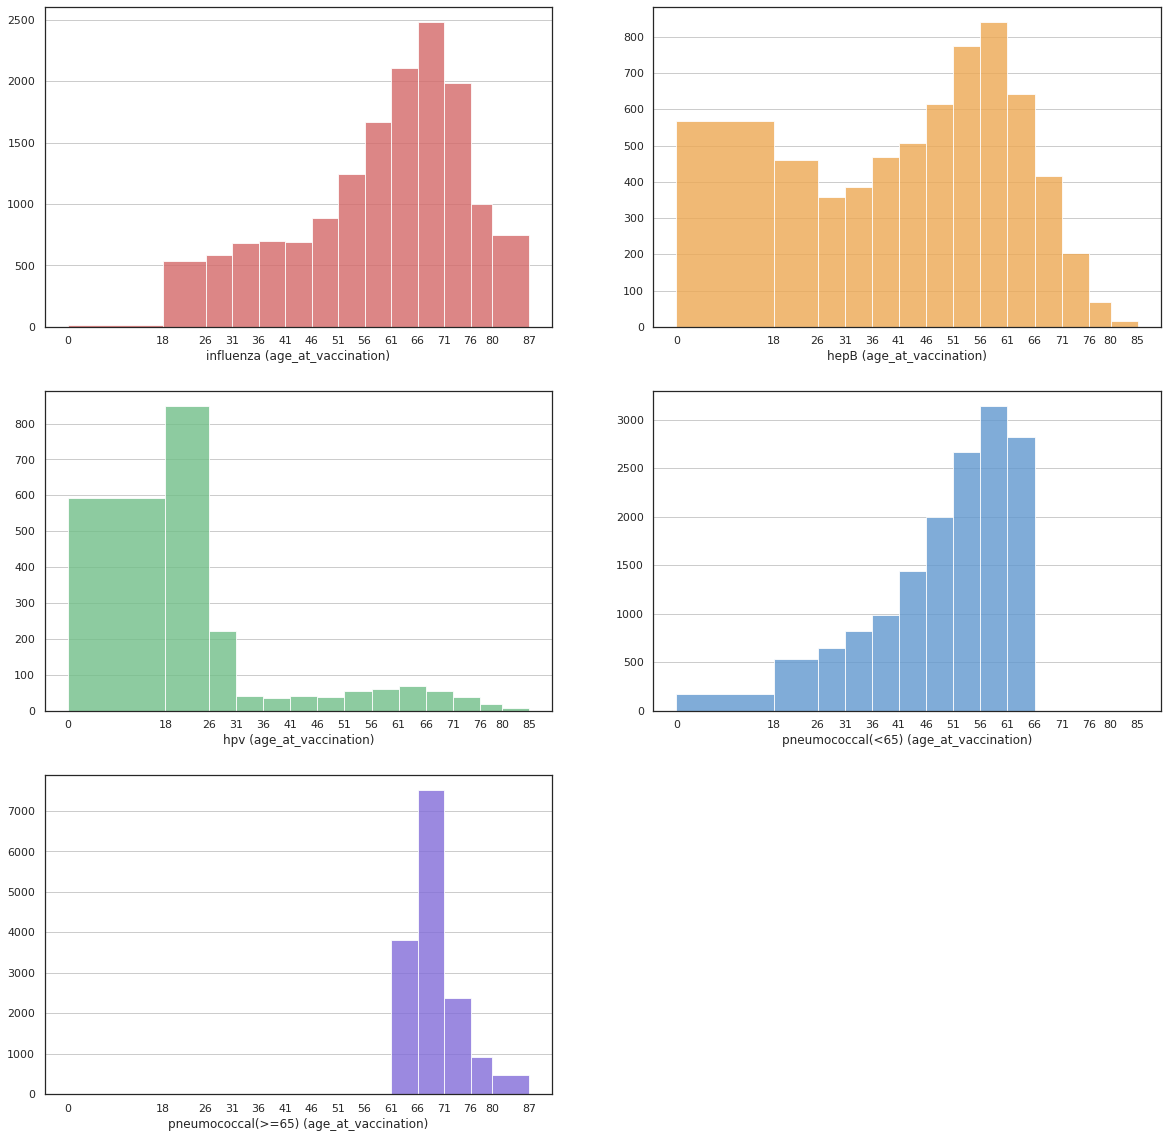

In [28]:
# Create histograms for age at vaccination
width = 2
height = math.ceil(len(vac_demographic_dfs) / 2) 
fig, axes = plt.subplots(height, 2, figsize=(20, 20))
i = 0
for y in range(height):
    for x in range(width):
        if (i < len(vac_demographic_dfs)):
            create_age_at_vaccination_histogram(
                vac_demographic_dfs[i], vac_demographic_df_names[i], 
                "age_at_vaccination", axes[y, x])
            i = i + 1
        else:
            break
axes[2,1].set_visible(False)

In [29]:
df = demographic_dfs[5]
len(df[df['age_in_2018']<18]) # number of patients who are under 18 in 2018

317

/home/jupyter-user/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


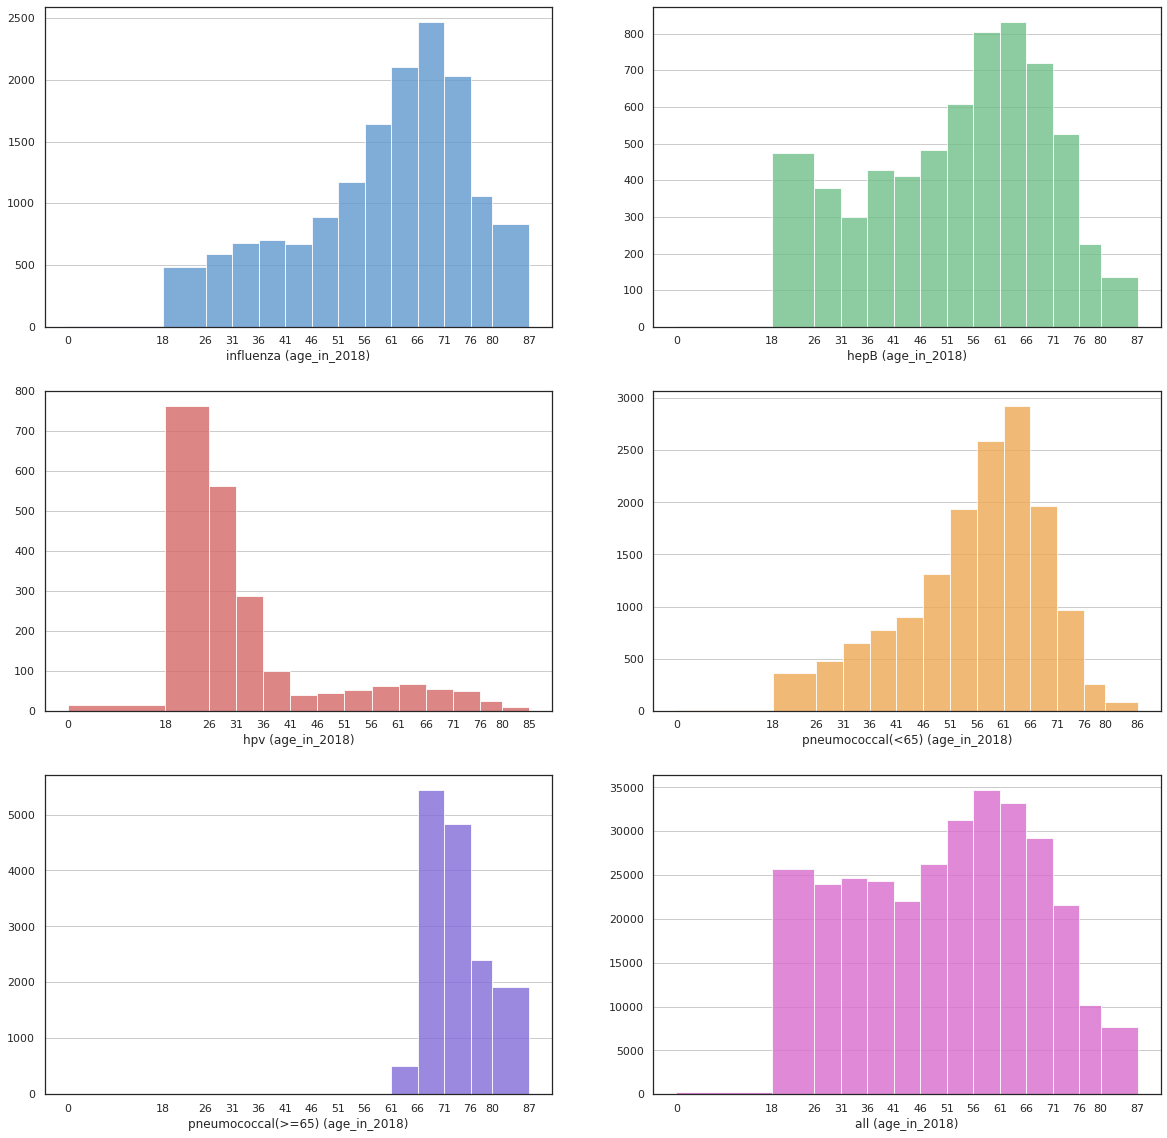

In [30]:
# Create histograms for age in 2018
cohort_colors = {
    "influenza": "#6198cf",
    "hepB": "#71bf88",
    "hpv": "#d46868",
    "pneumococcal(<65)": "#eda853",
    "pneumococcal(>=65)": "#826cd9",
    "all": "#d96cce"
}

width = 2
height = math.ceil(len(demographic_dfs) / 2) 
fig, axes = plt.subplots(height, 2, figsize=(20, 20))
i = 0
for y in range(height):
    for x in range(width):
        if (i < len(demographic_dfs)):
            create_age_in_2018_histogram(demographic_dfs[i], demographic_df_names[i], "age_in_2018", axes[y, x])
            i = i + 1
        else:
            break

In [31]:
# Prepare dataframes for visualization again
demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                   pneumococcal_demographics_65_and_over, all_patients_demographics]
vac_demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                            pneumococcal_demographics_65_and_over]
demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
vac_demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)"]


In [39]:
import scipy.stats as st
data = influenza_demographics['gender'].values
# st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
data

array(['Not man only, not woman only, prefer not to answer, or skipped',
       'Female', 'Female', ..., 'Male', 'Male', 'Male'], dtype=object)

In [41]:
import statsmodels.stats as stt

In [43]:
ci_low, ci_upp = stt.proportion.proportion_confint(6106, 15346, alpha=0.05, method='normal')

In [44]:
ci_low, ci_upp

(0.39014462322372734, 0.4056327780534784)

In [32]:
# Table for Gender
output_dfs = []
for i in range(len(demographic_dfs)):
    this_df = pd.DataFrame(demographic_dfs[i].gender.value_counts())
    total = len(demographic_dfs[i].index)
    this_df['percent'] = this_df['gender'] * 100/ total
    this_df['percent'] =  this_df['percent'].map('({:,.1f}%)'.format)
    this_df['combined'] = this_df['gender'].astype(str) + " " + this_df['percent'].astype(str)
    this_df = this_df[['combined']]
    this_df.columns =[demographic_df_names[i] + "_gender"]
    output_dfs.append(this_df.stack())
    
gender_summary = pd.concat(output_dfs, axis=0).unstack() 
gender_summary =  gender_summary[[i + "_gender" for i in demographic_df_names]]
num_of_rows = len(gender_summary.index)
gender_summary = gender_summary.reindex(['Female', 'Male', 'Not man only, not woman only, prefer not to answer, or skipped','No matching concept'])
assert ( len(gender_summary.index)== num_of_rows), "Reindex missing rows"

gender_summary.loc['Total Patients'] = [len(df.index) for df in demographic_dfs]
gender_summary.fillna('0 (0.0%)',inplace=True )
account_for_missing(gender_summary, "Total Patients", "Missing")

,influenza_gender,hepB_gender,hpv_gender,pneumococcal(<65)_gender,pneumococcal(>=65)_gender,all_gender
Female,8899 (58.0%),3752 (59.3%),1634 (76.9%),8498 (55.8%),7758 (51.4%),189570 (60.1%)
Male,6106 (39.8%),2427 (38.4%),404 (19.0%),6400 (42.1%),7086 (46.9%),118850 (37.7%)
"Not man only, not woman only, prefer not to answer, or skipped",289 (1.9%),122 (1.9%),72 (3.4%),288 (1.9%),239 (1.6%),6574 (2.1%)
No matching concept,52 (0.3%),22 (0.3%),15 (0.7%),31 (0.2%),17 (0.1%),303 (0.1%)
Total Patients,15346,6323,2125,15217,15100,315297
Missing,0.00,0.00,0.00,0.00,0.00,0.00


In [33]:
# Table for Race
output_dfs = []
for i in range(len(demographic_dfs)):
    this_df = pd.DataFrame(demographic_dfs[i].race.value_counts())
    total = len(demographic_dfs[i].index)
    this_df['percent'] = this_df['race'] * 100/ total
    this_df['percent'] =  this_df['percent'].map('({:,.1f}%)'.format)
    this_df['combined'] = this_df['race'].astype(str) + " " + this_df['percent'].astype(str)
    this_df = this_df[['combined']]
    this_df.columns =[demographic_df_names[i]]
    output_dfs.append(this_df.stack())
    
race_summary = pd.concat(output_dfs, axis=0).unstack() 
race_summary =  race_summary[demographic_df_names]
num_of_rows = len(race_summary.index)
# print(race_summary.index)
race_summary = race_summary.reindex(['White', 'Black or African American', 'Asian', 'Another single population', 'More than one population', 'I prefer not to answer', 'PMI: Skip', 
                   'None Indicated', 'None of these', 'No matching concept'])
# print(race_summary.index)
assert len(race_summary.index) == num_of_rows, "Reindex not missing any rows"
race_summary.loc['Unique Patients'] = [len(df.person_id.unique()) for df in demographic_dfs]
race_summary = move_row_to_top(race_summary, 'Unique Patients')
race_summary = add_cohort_size_row(race_summary)
race_summary = account_for_missing(race_summary, "Unique Patients", "Missing")
display(create_download_link(race_summary))
display(race_summary)

HERE


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Unique Patients,15346,6323,2125,15217,15100,315297
White,10611 (69.1%),3907 (61.8%),1308 (61.6%),8404 (55.2%),12116 (80.2%),166917 (52.9%)
Black or African American,2181 (14.2%),1092 (17.3%),271 (12.8%),3996 (26.3%),1321 (8.7%),68112 (21.6%)


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15346,6323,2125,15217,15100,315297
White,10611 (69.1%),3907 (61.8%),1308 (61.6%),8404 (55.2%),12116 (80.2%),166917 (52.9%)
Black or African American,2181 (14.2%),1092 (17.3%),271 (12.8%),3996 (26.3%),1321 (8.7%),68112 (21.6%)
Asian,360 (2.3%),159 (2.5%),108 (5.1%),236 (1.6%),219 (1.5%),10562 (3.3%)
Another single population,78 (0.5%),37 (0.6%),10 (0.5%),72 (0.5%),66 (0.4%),2292 (0.7%)
More than one population,241 (1.6%),128 (2.0%),80 (3.8%),263 (1.7%),115 (0.8%),5619 (1.8%)
I prefer not to answer,93 (0.6%),48 (0.8%),13 (0.6%),112 (0.7%),67 (0.4%),2177 (0.7%)
PMI: Skip,192 (1.3%),77 (1.2%),8 (0.4%),193 (1.3%),267 (1.8%),3554 (1.1%)
None Indicated,1399 (9.1%),783 (12.4%),294 (13.8%),1736 (11.4%),769 (5.1%),52418 (16.6%)


In [34]:
# Table for Ethnicity
output_dfs = []
for i in range(len(demographic_dfs)):
    this_df = pd.DataFrame(demographic_dfs[i].ethnicity.value_counts())
    total = len(demographic_dfs[i].index)
    this_df['percent'] = this_df['ethnicity'] * 100/ total
    this_df['percent'] =  this_df['percent'].map('({:,.1f}%)'.format)
    this_df['combined'] = this_df['ethnicity'].astype(str) + " " + this_df['percent'].astype(str)
    this_df = this_df[['combined']]
    this_df.columns =[demographic_df_names[i]]
    output_dfs.append(this_df.stack())
    
ethnicity_summary = pd.concat(output_dfs, axis=0).unstack() 
ethnicity_summary =  ethnicity_summary[demographic_df_names]
num_of_rows = len(ethnicity_summary.index)
# display(ethnicity_summary)
# print(ethnicity_summary.index)
ethnicity_summary.rename({'What Race Ethnicity: Race Ethnicity None Of These': "None of These"}, axis=0, inplace=True)
ethnicity_summary = ethnicity_summary.reindex(['Not Hispanic or Latino','Hispanic or Latino', 'None of These','PMI: Prefer Not To Answer','PMI: Skip' ])
# print(ethnicity_summary.index)
assert ( len(ethnicity_summary.index)== num_of_rows), "Reindex missing rows"
ethnicity_summary.loc['Unique Patients'] = [len(df.person_id.unique()) for df in demographic_dfs]
ethnicity_summary = move_row_to_top(ethnicity_summary, 'Unique Patients')
ethnicity_summary = add_cohort_size_row(ethnicity_summary)
ethnicity_summary = account_for_missing(ethnicity_summary, "Unique Patients", "Missing")
display(create_download_link(ethnicity_summary))
display(ethnicity_summary)

HERE


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Unique Patients,15346,6323,2125,15217,15100,315297
Not Hispanic or Latino,13341 (86.9%),5228 (82.7%),1741 (81.9%),12782 (84.0%),13758 (91.1%),246940 (78.3%)
Hispanic or Latino,1581 (10.3%),900 (14.2%),345 (16.2%),1956 (12.9%),865 (5.7%),59283 (18.8%)


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15346,6323,2125,15217,15100,315297
Not Hispanic or Latino,13341 (86.9%),5228 (82.7%),1741 (81.9%),12782 (84.0%),13758 (91.1%),246940 (78.3%)
Hispanic or Latino,1581 (10.3%),900 (14.2%),345 (16.2%),1956 (12.9%),865 (5.7%),59283 (18.8%)
None of These,139 (0.9%),70 (1.1%),18 (0.8%),174 (1.1%),143 (0.9%),3343 (1.1%)
PMI: Prefer Not To Answer,93 (0.6%),48 (0.8%),13 (0.6%),112 (0.7%),67 (0.4%),2177 (0.7%)
PMI: Skip,192 (1.3%),77 (1.2%),8 (0.4%),193 (1.3%),267 (1.8%),3554 (1.1%)
Missing,0,0,0,0,0,0


In [35]:
# Table for States
output_dfs = []
for i in range(len(demographic_dfs)):
    this_df = pd.DataFrame(demographic_dfs[i].state.value_counts())
    this_df.reset_index(inplace=True)
    this_df.columns = ["state", 'count']
    total = this_df['count'].sum()
    this_df['percent'] = this_df['count'] * 100 / total
    this_df['percent'] =  this_df['percent'].map('({:,.1f}%)'.format)
    this_df['combined'] = this_df['state'].astype(str) + " : " + this_df['count'].astype(str) + " " +this_df['percent'].astype(str)
    this_df = this_df[['combined']]
    this_df.columns =[demographic_df_names[i] + "_states"]
    output_dfs.append(this_df.stack())
    
states_summary = pd.concat(output_dfs, axis=0).unstack() 
states_summary =  states_summary[[i + "_states" for i in demographic_df_names]]
states_summary.loc['Cohort Size'] = [len(df.index) for df in demographic_dfs]
states_summary = account_for_missing(states_summary, "Cohort Size", "Missing")
states_summary = move_row_to_top(states_summary, 'Missing')
states_summary = move_row_to_top(states_summary, 'Cohort Size')
states_summary.head(22)

,influenza_states,hepB_states,hpv_states,pneumococcal(<65)_states,pneumococcal(>=65)_states,all_states
Cohort Size,15346,6323,2125,15217,15100,315297
Missing,0.00,0.00,0.00,0.00,0.00,0.00
0,Pennsylvania : 5861 (38.2%),Pennsylvania : 2538 (40.1%),Massachusetts : 666 (31.3%),Pennsylvania : 4897 (32.2%),Pennsylvania : 4822 (31.9%),California : 42111 (13.4%)
1,Massachusetts : 2328 (15.2%),Massachusetts : 1287 (20.4%),Pennsylvania : 629 (29.6%),Massachusetts : 2226 (14.6%),Massachusetts : 3059 (20.3%),Arizona : 37480 (11.9%)
2,Wisconsin : 1839 (12.0%),Wisconsin : 575 (9.1%),Wisconsin : 471 (22.2%),State Information Suppressed for Privacy : 158...,State Information Suppressed for Privacy : 217...,Illinois : 29862 (9.5%)
3,New York : 1621 (10.6%),State Information Suppressed for Privacy : 469...,New York : 99 (4.7%),New York : 1414 (9.3%),New York : 1333 (8.8%),Pennsylvania : 29138 (9.2%)
4,State Information Suppressed for Privacy : 139...,California : 377 (6.0%),State Information Suppressed for Privacy : 80 ...,Alabama : 1275 (8.4%),California : 1312 (8.7%),New York : 27826 (8.8%)
5,California : 1128 (7.4%),Illinois : 315 (5.0%),California : 65 (3.1%),Wisconsin : 1140 (7.5%),Wisconsin : 1118 (7.4%),Massachusetts : 25456 (8.1%)
6,Mississippi : 215 (1.4%),New York : 293 (4.6%),Alabama : 50 (2.4%),California : 975 (6.4%),Alabama : 536 (3.5%),Alabama : 19976 (6.3%)
7,Illinois : 198 (1.3%),Arizona : 159 (2.5%),Illinois : 20 (0.9%),Illinois : 592 (3.9%),Illinois : 234 (1.5%),Wisconsin : 15840 (5.0%)


In [36]:
# Prepare dataframes for visualization again
demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                   pneumococcal_demographics_65_and_over, all_patients_demographics]
vac_demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                            pneumococcal_demographics_65_and_over]
demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
vac_demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)"]

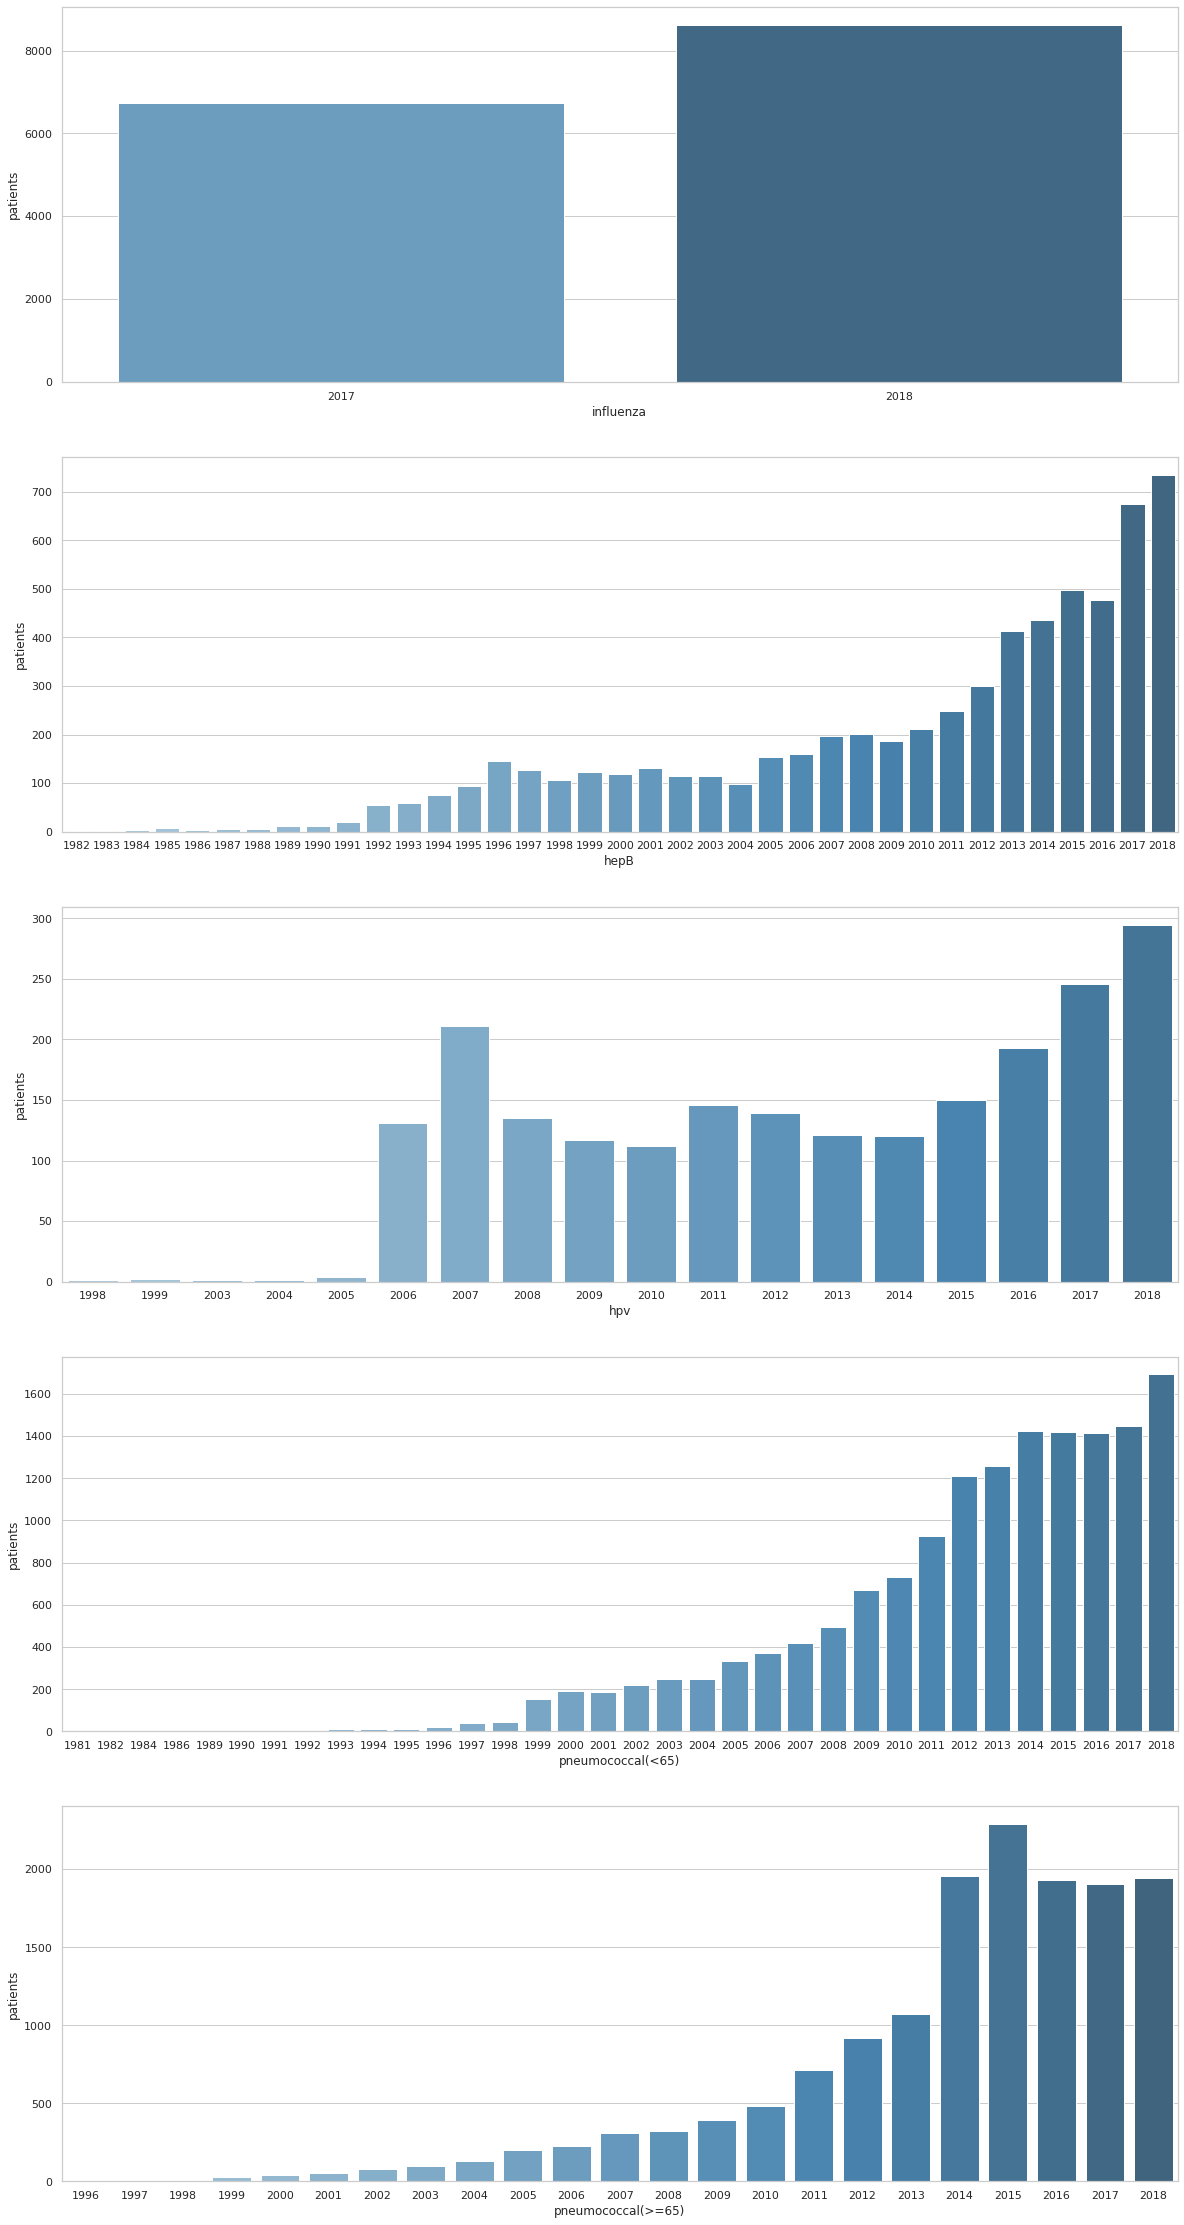

In [37]:
# Bar Charts for Vaccination Year
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
#sns.set_palette("flare")

# Bar graph by year for date of first vaccine exposure
def create_vaccination_year_bar(df, label, ax):
    df_with_vaccination_year = df.copy()
    df_with_vaccination_year["vaccine_year"] =  pd.DatetimeIndex(df_with_vaccination_year['drug_exposure_start_date']).year
    df_with_vaccination_year = (df_with_vaccination_year.groupby(['vaccine_year'])
                .size()
                .reset_index(name="patients"))
    pal = create_color_palette(df_with_vaccination_year['vaccine_year'].max(), df_with_vaccination_year['vaccine_year'].min())
    bp = sns.barplot(x='vaccine_year', y="patients", data=df_with_vaccination_year,
                       ax=ax, palette=pal)
    bp.set(xlabel=label)
    return bp

# Create bar for year of vaccination
# width = 2
# height = math.ceil(len(vac_demographic_dfs) / 2) 
# fig, axes = plt.subplots(height, 2, figsize=(20, 20))
# i = 0
# for y in range(height):
#     for x in range(width):
#         if (i < len(vac_demographic_dfs)):
#             create_vaccination_year_bar(vac_demographic_dfs[i], vac_demographic_df_names[i], axes[y, x])
#             i = i + 1
#         else:
#             break
height = len(vac_demographic_dfs)
fig, axes = plt.subplots(height, 1, figsize=(20, 40))
for y in range(height):
        create_vaccination_year_bar(vac_demographic_dfs[y], vac_demographic_df_names[y], axes[y])
    

# BASICS Survey

## Import BASICS Survey

In [26]:
import_df("influenza_basics")
import_df("hepB_basics")
import_df("hpv_basics")
import_df("pneumococcal_under_65_basics")
import_df("pneumococcal_65_and_over_basics")
import_df("all_patients_basics")

[INFO] influenza_basics.h5 is successfully downloaded into your working space
[INFO] hepB_basics.h5 is successfully downloaded into your working space
[INFO] hpv_basics.h5 is successfully downloaded into your working space
[INFO] pneumococcal_under_65_basics.h5 is successfully downloaded into your working space
[INFO] pneumococcal_65_and_over_basics.h5 is successfully downloaded into your working space
[INFO] all_patients_basics.h5 is successfully downloaded into your working space


## Analysis

In [65]:
# Aggregate BASICS dataframes
with_basics_dfs = [influenza_basics, hepB_basics, hpv_basics, 
                   pneumococcal_under_65_basics, pneumococcal_65_and_over_basics, all_patients_basics]
basics_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
vac_basics_dfs = [influenza_basics, hepB_basics, hpv_basics, 
                   pneumococcal_under_65_basics, pneumococcal_65_and_over_basics]
vac_basics_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)"]
        
change_cols_to_date(vac_basics_dfs, ['drug_exposure_start_date', 'survey_date'])     

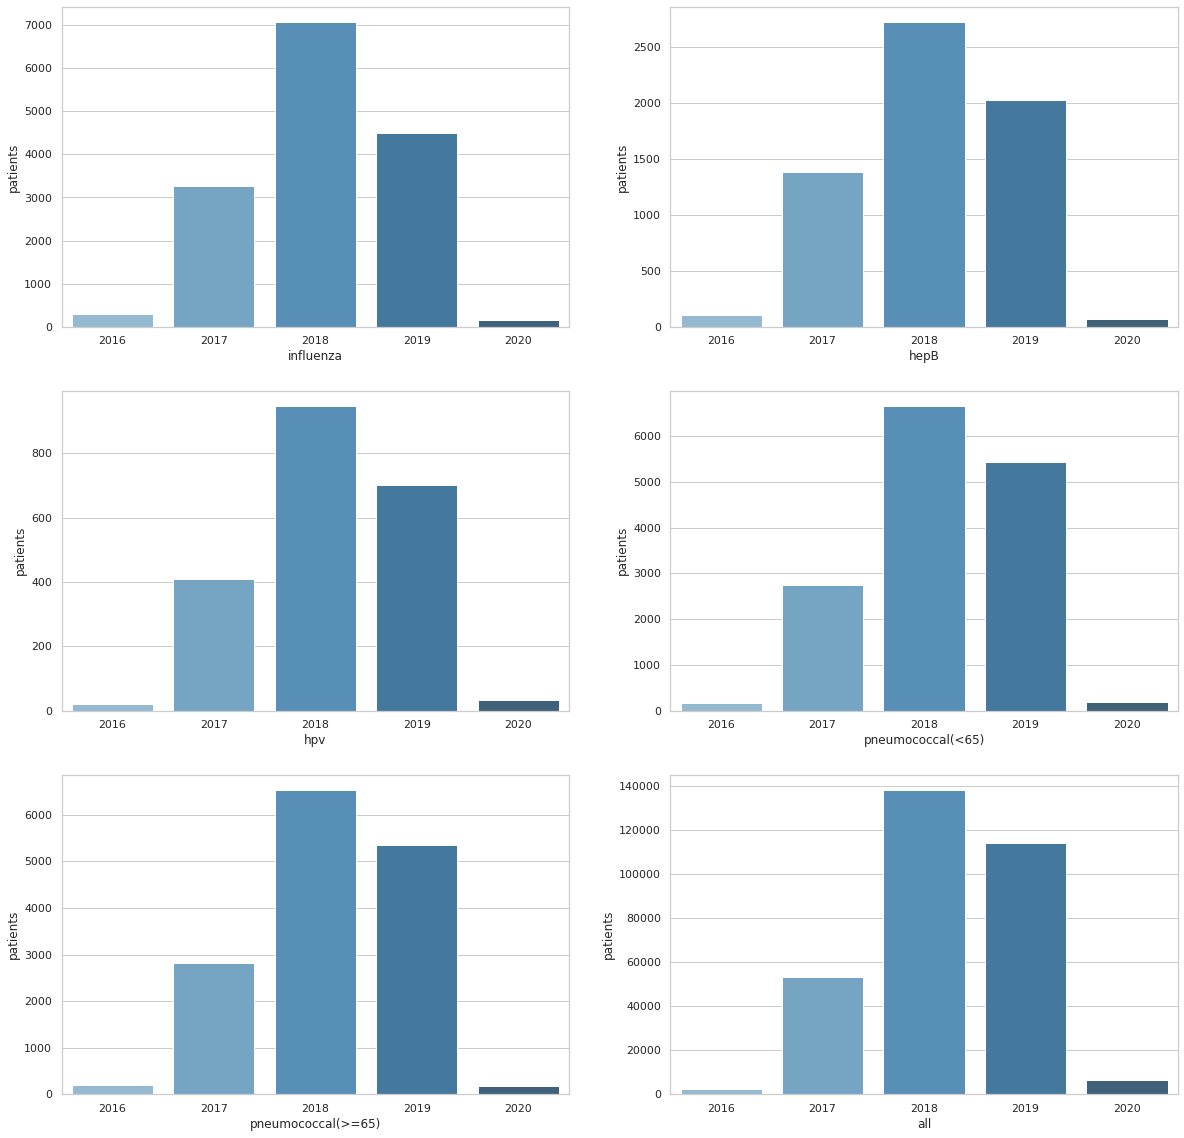

In [66]:
# Create bar graphs for survey year
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
#sns.set_palette("flare")

# Bar graph by year of survey response
def create_survey_year_bar(df, label, ax):
    df_with_survey_year = df.copy()
    df_with_survey_year["survey_year"] =  pd.DatetimeIndex(df_with_survey_year['survey_date']).year
    # if a patient has multiple surveys, get earliest year 
    df_with_survey_year = df_with_survey_year.groupby(['person_id'])['survey_year'].min().reset_index(name="survey_year")
    df_with_survey_year = df_with_survey_year.groupby(['survey_year']).size().reset_index(name="patients")
    assert df_with_survey_year['patients'].sum() == len(df['person_id'].unique())
    pal = create_color_palette(df_with_survey_year['survey_year'].max(), df_with_survey_year['survey_year'].min())
    bp= sns.barplot(x='survey_year', y="patients", data=df_with_survey_year,
                       ax=ax, palette=pal)
    bp.set(xlabel=label)
    return bp

# Create bar for year of survey
width = 2
height = math.ceil(len(with_basics_dfs) / 2) 
fig, axes = plt.subplots(height, 2, figsize=(20, 20))
i = 0
for y in range(height):
    for x in range(width):
        if (i < len(with_basics_dfs)):
            create_survey_year_bar(with_basics_dfs[i], basics_df_names[i], axes[y, x])
            i = i + 1
        else:
            break

In [67]:
# Aggregate BASICS dataframes
with_basics_dfs = [influenza_basics, hepB_basics, hpv_basics, 
                   pneumococcal_under_65_basics, pneumococcal_65_and_over_basics, all_patients_basics]
basics_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]

# with_basics_dfs

In [68]:
len(hepB_basics.person_id.unique())

6301

In [69]:
# Table for Vaccination Date - Survey Date 
day_diff_lists = []
day_diff_description = []
for df in vac_basics_dfs:
    group_by_patients = df.copy()

    group_by_patients = group_by_patients.groupby(['person_id','drug_exposure_start_date'])['survey_date'].min().reset_index(name='survey_date')
    day_diff = (group_by_patients['drug_exposure_start_date'] - group_by_patients['survey_date']).dt.days.astype(int)
    day_diff_lists.append(day_diff.describe().tolist())
    day_diff_description = day_diff.describe().index
    
day_diff_columns = [name for name in vac_basics_df_names ]   
day_diff_summary = pd.DataFrame(list(zip(*day_diff_lists)), columns=day_diff_columns)
day_diff_summary.set_index(day_diff_description, inplace=True)
day_diff_summary
day_diff_summary = add_cohort_size_row(day_diff_summary)
account_for_missing(day_diff_summary)   

,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65)
Cohort Size,15346.00,6323.00,2125.00,15217.00,15100.00
count,15294.00,6301.00,2110.00,15186.00,15083.00
mean,-187.31,-2940.40,-1997.28,-2181.58,-1573.48
std,276.87,2758.76,1523.09,1827.47,1372.09
min,-1014.00,-12840.00,-7327.00,-13739.00,-7862.00
25%,-383.00,-4579.00,-3371.50,-3124.00,-2173.50
50%,-206.00,-1981.00,-1862.50,-1762.00,-1274.00
75%,1.00,-728.00,-596.00,-786.00,-587.50
max,576.00,778.00,549.00,751.00,824.00
missing,52.00,22.00,15.00,31.00,17.00


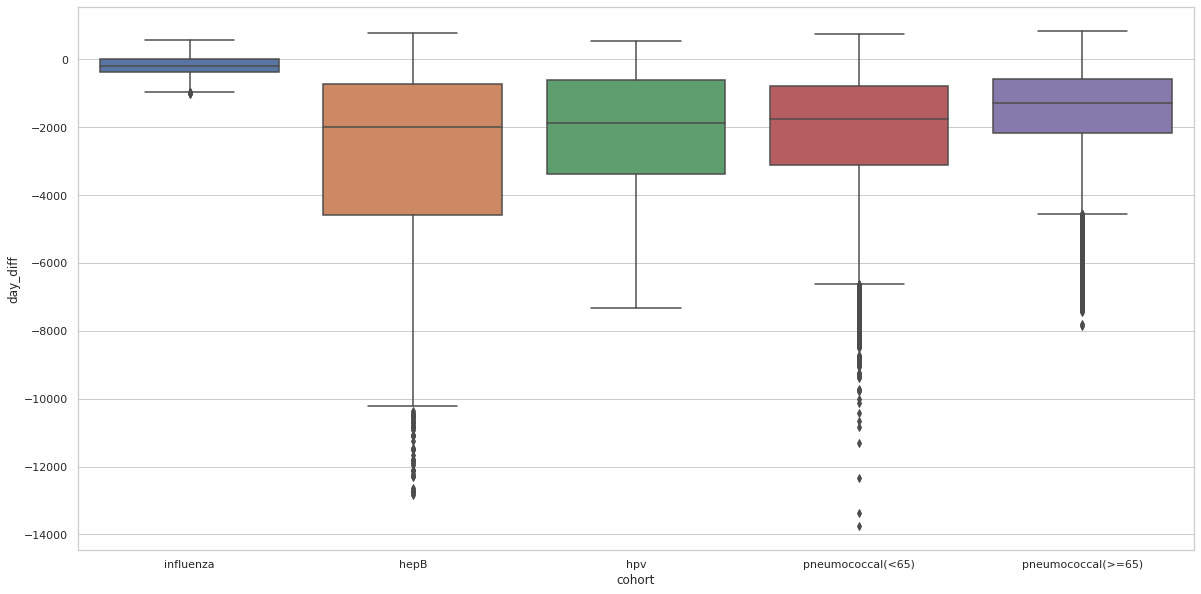

In [70]:
# Create box plot for Vaccination Date - Survey Date
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
#sns.set_palette("flare")


diff_df = pd.DataFrame(columns=['day_diff', 'cohort'])
for i in range(len(vac_basics_dfs)):
    group_by_patients = vac_basics_dfs[i].copy()
    group_by_patients = group_by_patients.groupby(['person_id','drug_exposure_start_date'])['survey_date'].min().reset_index(name='survey_date')
    day_diff = (group_by_patients['drug_exposure_start_date'] - group_by_patients['survey_date']).dt.days.astype(int)
    temp = pd.DataFrame(data=day_diff, columns=['day_diff'])
    temp['cohort'] = vac_basics_df_names[i]
    diff_df = diff_df.append(temp, ignore_index=True)
#     print(diff_df)
    
# diff_df
plt.figure(figsize=(20, 10))
box = sns.boxplot(y='day_diff', x='cohort', data=diff_df)

In [28]:
# Aggregate BASICS dataframes
with_basics_dfs = [influenza_basics, hepB_basics, hpv_basics, 
                   pneumococcal_under_65_basics, pneumococcal_65_and_over_basics, all_patients_basics]
basics_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]

# with_basics_dfs

In [29]:
# Create tables for all questions in BASICS Survey
questions = []
# questions_ = {question: pd.DataFrame(columns=basics_df_names) for question in list(hepB_basics_df['question'].unique())}
questions = dict()
questions_output_dfs = {question: [] for question in list(all_patients_basics['question'].unique())}
patient_counts = dict()

for i in range(len(with_basics_dfs)):
#     print(basics_df_names[i])
    temp_df = with_basics_dfs[i].copy()
    temp = temp_df.groupby(['question', 'answer']).size().reset_index(name="count")
    for (q), count_df in temp.groupby(['question']):
        t = count_df[['answer', 'count']].set_index('answer', drop=True)
        temp_df_q = temp_df[temp_df['question']==q]
        unique_patients = len(temp_df_q.person_id.unique())
        assert len(temp_df_q.index) ==  t['count'].sum()
#         print(len(temp_df_q.index), t['count'].sum())
        t = t[['count']]
        total_answers = t['count'].sum()
        assert total_answers >= unique_patients
        t.loc["Unique Patients"] = unique_patients
        t.loc['Total Answers'] = total_answers
        t.columns = [basics_df_names[i]]
        questions_output_dfs[q].append(t)

for key, list_of_dfs in questions_output_dfs.items():
    temp_df =  pd.concat(list_of_dfs, axis=1)
    temp_df = add_cohort_size_row(temp_df)
    temp_df = account_for_missing(temp_df, "Unique Patients", "Missing Patients")
    temp_df['mean'] = temp_df.mean(axis=1)
    temp_df = temp_df.sort_values(['mean'], ascending=[False])
#     display(temp_df)

    
    if (key == "Income: Annual Income"):
        temp_df.loc["Prefer not to answer, skipped, or missing"] = temp_df.loc["PMI: Prefer Not To Answer"] + temp_df.loc["PMI: Skip"] + temp_df.loc["Missing Patients"] 
#     display(temp_df)
    for col in temp_df.columns:
#         total = temp_df[col].loc['Total Answers']
        total = temp_df[col].loc['Cohort Size']

        total_patients = temp_df[col].loc['Unique Patients']
        

        temp_df[col + "_percent"] = temp_df[col] * 100 / total
        temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
        temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
        temp_df[col] =  temp_df[col + "_combined"]
        temp_df.at['Unique Patients', col] = total_patients
        temp_df = move_row_to_top(temp_df, "Unique Patients")
        temp_df.at['Total Answers', col] = total
        
        
    
    temp_df = temp_df[basics_df_names]
    questions[key] = temp_df

for key, table in questions.items():
    initial_index_count = len(table.index)
    if (key == "Income: Annual Income"):
#         table = table.reindex(['Cohort Size', 'Unique Patients','Total Answers', 'Annual Income: less 10k',
#             'Annual Income: 10k 25k', 'Annual Income: 25k 35k', 
#             'Annual Income: 35k 50k','Annual Income: 50k 75k',
#             'Annual Income: 75k 100k','Annual Income: 100k 150k', 
#            'Annual Income: 150k 200k',
#             'Annual Income: more 200k', 'PMI: Prefer Not To Answer', 'PMI: Skip'])
            table = table.reindex(['Cohort Size', 'Unique Patients','Total Answers', 'Annual Income: less 10k',
                'Annual Income: 10k 25k', 'Annual Income: 25k 35k', 
                'Annual Income: 35k 50k','Annual Income: 50k 75k',
                'Annual Income: 75k 100k','Annual Income: 100k 150k', 
               'Annual Income: 150k 200k',
                'Annual Income: more 200k', 'Prefer not to answer, skipped, or missing'])

    elif (key=="Health Insurance: Insurance Type Update"):
        continue
#     assert len(table.index) == initial_index_count
    print(key)
    table = add_cohort_size_row(table)
#     table = account_for_missing(table, "Unique Patients", "Missing Patients")
    display(table)
    display(create_download_link(table))
#     display(table)


Insurance: Health Insurance


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15293,6301,2110,15183,15079,314976
Total Answers,15346,6323,2125,15217,15100,315297
Health Insurance: Yes,14719 (95.9%),6039 (95.5%),2049 (96.4%),14204 (93.3%),14751 (97.7%),283089 (89.8%)
Health Insurance: No,354 (2.3%),155 (2.5%),28 (1.3%),666 (4.4%),130 (0.9%),22883 (7.3%)
PMI: Skip,136 (0.9%),57 (0.9%),10 (0.5%),159 (1.0%),164 (1.1%),3265 (1.0%)
PMI: Prefer Not To Answer,48 (0.3%),27 (0.4%),11 (0.5%),96 (0.6%),26 (0.2%),2937 (0.9%)
PMI: Dont Know,36 (0.2%),23 (0.4%),12 (0.6%),58 (0.4%),8 (0.1%),2802 (0.9%)
Missing Patients,53 (0.3%),22 (0.3%),15 (0.7%),34 (0.2%),21 (0.1%),321 (0.1%)


Employment: Employment Status


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15294,6301,2110,15186,15083,314994
Total Answers,15346,6323,2125,15217,15100,315297
Not currently employed for wages,9945 (64.8%),3619 (57.2%),938 (44.1%),9903 (65.1%),12376 (82.0%),169596 (53.8%)
Employed for wages or self-employed,5740 (37.4%),2863 (45.3%),1413 (66.5%),5427 (35.7%),3176 (21.0%),149504 (47.4%)
PMI: Prefer Not To Answer,168 (1.1%),78 (1.2%),35 (1.6%),235 (1.5%),69 (0.5%),7342 (2.3%)
PMI: Skip,111 (0.7%),47 (0.7%),5 (0.2%),117 (0.8%),111 (0.7%),2761 (0.9%)
Missing Patients,52 (0.3%),22 (0.3%),15 (0.7%),31 (0.2%),17 (0.1%),303 (0.1%)


Education Level: Highest Grade


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15294,6301,2110,15186,15083,314994
Total Answers,15346,6323,2125,15217,15100,315297
College graduate or advanced degree,7814 (50.9%),3053 (48.3%),1130 (53.2%),5548 (36.5%),8907 (59.0%),131462 (41.7%)
Highest Grade: College One to Three,3763 (24.5%),1556 (24.6%),525 (24.7%),4476 (29.4%),3414 (22.6%),80110 (25.4%)
Highest Grade: Twelve Or GED,2535 (16.5%),1081 (17.1%),360 (16.9%),3344 (22.0%),1891 (12.5%),64006 (20.3%)
Less than a high school degree or equivalent,948 (6.2%),498 (7.9%),80 (3.8%),1494 (9.8%),655 (4.3%),31984 (10.1%)
PMI: Skip,174 (1.1%),92 (1.5%),10 (0.5%),235 (1.5%),178 (1.2%),5426 (1.7%)
PMI: Prefer Not To Answer,60 (0.4%),21 (0.3%),5 (0.2%),89 (0.6%),38 (0.3%),2006 (0.6%)


Income: Annual Income


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15294.00,6301.00,2110.00,15186.00,15083.00,314994.00
Total Answers,15346.00,6323.00,2125.00,15217.00,15100.00,315297.00
Annual Income: less 10k,1446.0 (9.4%),873.0 (13.8%),271.0 (12.8%),2597.0 (17.1%),571.0 (3.8%),49697.0 (15.8%)
Annual Income: 10k 25k,2048.0 (13.3%),902.0 (14.3%),261.0 (12.3%),2619.0 (17.2%),1612.0 (10.7%),38846.0 (12.3%)
Annual Income: 25k 35k,1187.0 (7.7%),450.0 (7.1%),196.0 (9.2%),1153.0 (7.6%),1142.0 (7.6%),22723.0 (7.2%)
Annual Income: 35k 50k,1379.0 (9.0%),522.0 (8.3%),219.0 (10.3%),1154.0 (7.6%),1496.0 (9.9%),24272.0 (7.7%)
Annual Income: 50k 75k,1773.0 (11.6%),644.0 (10.2%),238.0 (11.2%),1460.0 (9.6%),2118.0 (14.0%),31630.0 (10.0%)
Annual Income: 75k 100k,1415.0 (9.2%),512.0 (8.1%),178.0 (8.4%),1057.0 (6.9%),1650.0 (10.9%),24010.0 (7.6%)


Marital Status: Current Marital Status


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15294,6301,2110,15186,15083,314994
Total Answers,15346,6323,2125,15217,15100,315297
Current Marital Status: Married,7272 (47.4%),2538 (40.1%),529 (24.9%),5773 (37.9%),8353 (55.3%),129834 (41.2%)
Current Marital Status: Never Married,3009 (19.6%),1717 (27.2%),1116 (52.5%),3933 (25.8%),1343 (8.9%),82656 (26.2%)
Current Marital Status: Divorced,2342 (15.3%),961 (15.2%),99 (4.7%),2718 (17.9%),2513 (16.6%),44743 (14.2%)
Current Marital Status: Living With Partner,773 (5.0%),439 (6.9%),257 (12.1%),866 (5.7%),371 (2.5%),20932 (6.6%)
Current Marital Status: Widowed,1243 (8.1%),326 (5.2%),32 (1.5%),878 (5.8%),2071 (13.7%),16406 (5.2%)
Current Marital Status: Separated,382 (2.5%),193 (3.1%),37 (1.7%),619 (4.1%),226 (1.5%),11423 (3.6%)


Living Situation: Stable House Concern


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15294,6301,2110,15186,15083,314994
Total Answers,15346,6323,2125,15217,15100,315297
Stable House Concern: No,13360 (87.1%),5262 (83.2%),1783 (83.9%),12333 (81.0%),14188 (94.0%),254366 (80.7%)
Stable House Concern: Yes,1760 (11.5%),963 (15.2%),315 (14.8%),2675 (17.6%),722 (4.8%),55772 (17.7%)
PMI: Skip,174 (1.1%),76 (1.2%),12 (0.6%),178 (1.2%),173 (1.1%),4856 (1.5%)
Missing Patients,52 (0.3%),22 (0.3%),15 (0.7%),31 (0.2%),17 (0.1%),303 (0.1%)


In [73]:
# BASICS Survey: Health Insurance: Insurance Type Update
question = "Health Insurance: Insurance Type Update"
insurance_groups = {
    "Private Health Insurance": ["Insurance Type Update: Purchased", 
                                 "Insurance Type Update: Employer Or Union"],
    "Medicare" : ["Insurance Type Update: Medicare"],
    "Medicaid":["Insurance Type Update: Medicaid", ],
    "Military Healthcare":["Insurance Type Update: VA",
                          "Insurance Type Update: Military"
                          ],
    "Indian Health Service":["Insurance Type Update: Indian"],
    "Other Type of Health Insurance":["Insurance Type Update: Other Health Plan"],
    "No Health Insurance": ["Insurance Type Update: None"],
    "Invalid" : ["Invalid"],
    "Skip" : ["PMI: Skip"],
    "Total Answers" : ["Total Answers"],
    "Total Patients" : ["Total Patients"]
    
}
insurance_mapping = dict()
for k, v in insurance_groups.items():
    for x in v:
        insurance_mapping[x] = k
# print(insurance_mapping)
    
# print(get_group("Insurance Type Update: None"))
output_dfs = []
for i in range(len(with_basics_dfs)):
    temp = with_basics_dfs[i].copy()
    temp = temp.groupby(['question', 'answer']).size().reset_index(name="count")
    total_patients = len(with_basics_dfs[i]['person_id'].unique())
    for (q), count_df in temp.groupby(['question']):
        if (q == question):
            t = count_df[['answer', 'count']].set_index('answer', drop=True)
            t = t[['count']]
            total = t['count'].sum()
            t.loc['Total Answers'] = total
            t.loc['Total Patients'] = total_patients
            t.columns = [basics_df_names[i]]
            output_dfs.append(t)


temp_df =  pd.concat(output_dfs, axis=1)
# temp_df['mean'] = temp_df.mean(axis=1)
# temp_df = temp_df.sort_values(['mean'], ascending=[False])
temp_df = temp_df.groupby(by=insurance_mapping, axis=0).sum()
# print(temp_df)

for col in temp_df.columns:
    total = temp_df[col].loc['Total Answers']
    total_patients = temp_df[col].loc['Total Patients']
    
    temp_df[col + "_percent"] = temp_df[col] * 100 / total
    temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
    temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
    temp_df[col] =  temp_df[col + "_combined"]
    temp_df.at['Total Answers', col] = total
    temp_df.at['Total Patients', col] = total_patients
    

temp_df = temp_df[basics_df_names]
# temp_df

initial_index_count = len(temp_df.index)
temp_df = temp_df.reindex(['Total Patients', 'Total Answers', 'Medicaid', 'Medicare','Private Health Insurance',
       'Military Healthcare','Indian Health Service',
       'Other Type of Health Insurance','No Health Insurance' , 'Invalid', 'Skip',
       ])
# print(temp_df.index)
# assert len(temp_df.index) == initial_index_count
# print(question)
# account_for_missing(temp_df, "Total Patients", "Missing Patients")
# display(temp_df)
 

In [74]:
#%%script false --no-raise-error

# Overall Health Survey

## Import Overall Health Survey

In [75]:
import_df("influenza_overall_health")
import_df("hepB_overall_health")
import_df("hpv_overall_health")
import_df("pneumococcal_under_65_overall_health")
import_df("pneumococcal_65_and_over_overall_health")
import_df("all_patients_overall_health")

[INFO] influenza_overall_health.h5 is successfully downloaded into your working space
[INFO] hepB_overall_health.h5 is successfully downloaded into your working space
[INFO] hpv_overall_health.h5 is successfully downloaded into your working space
[INFO] pneumococcal_under_65_overall_health.h5 is successfully downloaded into your working space
[INFO] pneumococcal_65_and_over_overall_health.h5 is successfully downloaded into your working space
[INFO] all_patients_overall_health.h5 is successfully downloaded into your working space


In [76]:
pneumococcal_under_65_overall_health

,person_id,drug_exposure_start_date,answer,question_concept_id,survey_date,answer_concept_id,question
0,2748953,2016-04-04,Organ Transplant Description: Liver,1585806,2018-05-25,1585826,Organ Transplant: Organ Transplant Description
1,1714991,2016-08-01,Organ Transplant Description: Cornea,1585806,2019-01-20,1585830,Organ Transplant: Organ Transplant Description
2,1214084,2013-09-11,Organ Transplant Description: Heart,1585806,2018-12-14,1585824,Organ Transplant: Organ Transplant Description
3,3235560,2010-03-24,Organ Transplant Description: Heart,1585806,2017-04-29,1585824,Organ Transplant: Organ Transplant Description
4,3303107,2016-05-05,Organ Transplant Description: Kidney,1585806,2019-08-05,1585825,Organ Transplant: Organ Transplant Description
...,...,...,...,...,...,...,...
16195,1068346,2018-01-16,Organ Transplant: No,1585803,2020-02-13,1585805,Overall Health: Organ Transplant
16196,2553512,2017-11-26,Organ Transplant: No,1585803,2018-07-23,1585805,Overall Health: Organ Transplant
16197,1342097,2017-07-19,Organ Transplant: No,1585803,2018-10-23,1585805,Overall Health: Organ Transplant
16198,1795854,2013-08-05,Organ Transplant: No,1585803,2019-02-12,1585805,Overall Health: Organ Transplant


## Analysis

In [77]:
# Aggregate overall_health dataframes
with_overall_health_dfs = [influenza_overall_health, hepB_overall_health, hpv_overall_health, 
                   pneumococcal_under_65_overall_health, pneumococcal_65_and_over_overall_health, all_patients_overall_health]
overall_health_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
change_ids_to_str(with_overall_health_dfs, ["person_id", "question_concept_id", "answer_concept_id"])
# with_overall_health_dfs

In [78]:
# overall_health Survey: Organ Transplant
question = "Overall Health: Organ Transplant"
output_dfs = []
for i in range(len(with_overall_health_dfs)):
    temp = with_overall_health_dfs[i].copy()
    temp = temp.groupby(['question', 'answer']).size().reset_index(name="count")
    total = len(with_overall_health_dfs[i]['person_id'].unique())
    for (q), count_df in temp.groupby(['question']):
        if (q == question):
            t = count_df[['answer', 'count']].set_index('answer', drop=True)
            t = t[['count']]
            t.loc['Unique Patients'] = total
            t.columns = [overall_health_df_names[i]]
            t.index.name = 'patient_count'
            output_dfs.append(t)


temp_df =  pd.concat(output_dfs, axis=1)
organ_transplants_pts = temp_df.loc['Organ Transplant: Yes',:]

for col in temp_df.columns:
    total = temp_df[col].loc['Unique Patients']
    temp_df[col + "_percent"] = temp_df[col] * 100 / total
    temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
    temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
    temp_df[col] =  temp_df[col + "_combined"]
    temp_df.at['Unique Patients', col] = total

temp_df = temp_df[overall_health_df_names]

initial_index_count = len(temp_df.index)
assert len(temp_df.index) == initial_index_count
print(question)
# display(temp_df)
add_cohort_size_row(temp_df)
temp_df = move_row_to_top(temp_df, "Unique Patients")
temp_df = move_row_to_top(temp_df, "Cohort Size")
temp_df = account_for_missing(temp_df, "Unique Patients", "Missing")
display(create_download_link(temp_df))
display(temp_df)


Overall Health: Organ Transplant


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
patient_count,,,,,,
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15294,6301,2110,15186,15083,314994
Organ Transplant: No,14409 (94.2%),5789 (91.9%),2031 (96.3%),13913 (91.6%),14199 (94.1%),294936 (93.6%)
Organ Transplant: Yes,544 (3.6%),403 (6.4%),48 (2.3%),904 (6.0%),559 (3.7%),6934 (2.2%)
PMI: Dont Know,81 (0.5%),25 (0.4%),11 (0.5%),100 (0.7%),60 (0.4%),2078 (0.7%)
PMI: Skip,260 (1.7%),84 (1.3%),20 (0.9%),269 (1.8%),265 (1.8%),11046 (3.5%)
Missing,52,22,15,31,17,303


In [79]:
print(organ_transplants_pts)


def tranplants_find_missing(df, total_row_name='count', output_row_name="missing" ):
    diff = organ_transplants_pts.subtract(df.loc[total_row_name].astype(int)).fillna(0)
#     if (diff.sum() > 0):
    df.loc[output_row_name] = diff
#         df = move_row_to_top(df, 'Missing')
    return df

influenza              544
hepB                   403
hpv                     48
pneumococcal(<65)      904
pneumococcal(>=65)     559
all                   6934
Name: Organ Transplant: Yes, dtype: int64


In [80]:
# overall_health Survey: Organ Transplant Description
question = "Organ Transplant: Organ Transplant Description"
output_dfs = []
for i in range(len(with_overall_health_dfs)):
    temp_df = with_overall_health_dfs[i].copy()
    temp_df = temp_df[temp_df['question']==question]
    temp_df = temp_df[temp_df['answer']!="PMI: Skip"]
#     print(len(temp_df.person_id.unique()))
#     print(temp_df['answer'].describe())
#     total = temp_df.answer.value_counts().to_frame('count')['count'].sum()
    
    temp = temp_df.groupby(['question', 'answer']).size().reset_index(name="count")
#     total = len(with_overall_health_dfs[i]['person_id'].unique())
    for (q), count_df in temp.groupby(['question']):
        t = count_df[['answer', 'count']].set_index('answer', drop=True)
        t = t[['count']]
#         t.drop('PMI: Skip', axis=0, inplace=True)
        total = t['count'].sum()
        t.loc['Unique Patients'] = len(temp_df.person_id.unique())
        t.loc['Total Transplants'] = total
#         print(len(temp_df.person_id.unique()), total)
        t.columns = [overall_health_df_names[i]]
        output_dfs.append(t)


temp_df =  pd.concat(output_dfs, axis=1,sort=True)
temp_df.loc['Answered Organ Transplant: Yes'] = organ_transplants_pts
temp_df = tranplants_find_missing(temp_df, "Unique Patients", "Missing Patients")
temp_df.fillna(0,inplace=True )
temp_df = temp_df.astype(int)
for col in temp_df.columns:
    total = temp_df[col].loc['Total Transplants']
    unique = temp_df[col].loc['Unique Patients']
    answered_yes = temp_df[col].loc['Answered Organ Transplant: Yes']
    
    temp_df[col + "_percent"] = temp_df[col] * 100 / answered_yes
    temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
    temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
    temp_df[col] =  temp_df[col + "_combined"]
    temp_df.at['Total Transplants', col] = total
    temp_df.at['Unique Patients', col] = unique
    
temp_df = temp_df[overall_health_df_names]
temp_df = move_row_to_top(temp_df, 'Total Transplants' )
temp_df = move_row_to_top(temp_df, 'Unique Patients' )
temp_df.loc['Answered Organ Transplant: Yes'] = organ_transplants_pts
temp_df = move_row_to_top(temp_df, 'Answered Organ Transplant: Yes' )

initial_index_count = len(temp_df.index)
assert len(temp_df.index) == initial_index_count
print(question)
temp_df = temp_df.reindex(['Answered Organ Transplant: Yes', 'Unique Patients',
       'Total Transplants', 'Organ Transplant Description: Blood Vessels',
       'Organ Transplant Description: Bone',
       'Organ Transplant Description: Cornea',
       'Organ Transplant Description: Heart',
       'Organ Transplant Description: Intestine',
       'Organ Transplant Description: Kidney',
       'Organ Transplant Description: Liver',
       'Organ Transplant Description: Lung',  
       'Organ Transplant Description: Pancreas',
       'Organ Transplant Description: Skin',
       'Organ Transplant Description: Valve', 
      'Organ Transplant Description: Other Organ',
       'Organ Transplant Description: Other Tissue',
         'Missing Patients'])
 
display(temp_df)
display(create_download_link(temp_df))
# print(temp_df.index)

Organ Transplant: Organ Transplant Description


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Answered Organ Transplant: Yes,544,403,48,904,559,6934
Unique Patients,504,380,47,850,505,6210
Total Transplants,565,422,50,963,557,6890
Organ Transplant Description: Blood Vessels,14 (2.6%),17 (4.2%),1 (2.1%),30 (3.3%),13 (2.3%),270 (3.9%)
Organ Transplant Description: Bone,80 (14.7%),50 (12.4%),5 (10.4%),83 (9.2%),99 (17.7%),1139 (16.4%)
Organ Transplant Description: Cornea,55 (10.1%),11 (2.7%),2 (4.2%),45 (5.0%),89 (15.9%),682 (9.8%)
Organ Transplant Description: Heart,42 (7.7%),25 (6.2%),3 (6.2%),84 (9.3%),53 (9.5%),411 (5.9%)
Organ Transplant Description: Intestine,3 (0.6%),0 (0.0%),0 (0.0%),5 (0.6%),2 (0.4%),30 (0.4%)
Organ Transplant Description: Kidney,143 (26.3%),98 (24.3%),10 (20.8%),328 (36.3%),86 (15.4%),1491 (21.5%)
Organ Transplant Description: Liver,44 (8.1%),65 (16.1%),3 (6.2%),119 (13.2%),36 (6.4%),512 (7.4%)


In [81]:
#%%script false --no-raise-error

# Lifestyle Survey

## Import Lifestyle Survey

In [ ]:
import_df("influenza_lifestyle")
import_df("hepB_lifestyle")
import_df("hpv_lifestyle")
import_df("pneumococcal_under_65_lifestyle")
import_df("pneumococcal_65_and_over_lifestyle")
import_df("all_patients_lifestyle")

[INFO] influenza_lifestyle.h5 is successfully downloaded into your working space
[INFO] hepB_lifestyle.h5 is successfully downloaded into your working space
[INFO] hpv_lifestyle.h5 is successfully downloaded into your working space
[INFO] pneumococcal_under_65_lifestyle.h5 is successfully downloaded into your working space
[INFO] pneumococcal_65_and_over_lifestyle.h5 is successfully downloaded into your working space
[INFO] all_patients_lifestyle.h5 is successfully downloaded into your working space


## Analysis

In [ ]:
# Aggregate lifestyle dataframes
with_lifestyle_dfs = [influenza_lifestyle, hepB_lifestyle, hpv_lifestyle, 
                   pneumococcal_under_65_lifestyle, pneumococcal_65_and_over_lifestyle, all_patients_lifestyle]
lifestyle_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
change_ids_to_str(with_lifestyle_dfs, ["person_id", "question_concept_id", "answer_concept_id"])
# with_lifestyle_dfs

In [ ]:
# define create_tables

def create_tables(list_of_dfs, df_names):
    questions = []
    questions = dict()
    questions_output_dfs = {question: [] for question in list(list_of_dfs[-1]['question'].unique())}
    for i in range(len(list_of_dfs)):
        temp = list_of_dfs[i].copy()
        temp = temp.groupby(['question', 'answer']).size().reset_index(name="count")
#         total = len(list_of_dfs[i]['person_id'].unique())
        for (q), count_df in temp.groupby(['question']):
            t = count_df[['answer', 'count']].set_index('answer', drop=True)
            t = t[['count']]
            total = t['count'].sum()
            t.loc['Total Answers'] = total
            t.columns = [df_names[i]]
            questions_output_dfs[q].append(t)

    for key, list_of_dfs in questions_output_dfs.items():
        temp_df =  pd.concat(list_of_dfs, axis=1, sort=True)
        temp_df = add_cohort_size_row(temp_df)
        temp_df = account_for_missing(temp_df, "Total Answers", "Missing")
        if (key == "Smoking: 100 Cigs Lifetime" ):
            temp_df.loc["Prefer not to answer, Don't Know, Skipped, or Missing"] = temp_df.loc["PMI: Prefer Not To Answer"] + temp_df.loc["PMI: Dont Know"] + temp_df.loc["PMI: Skip"] + temp_df.loc["Missing"]
        elif(key in ["Alcohol: Drink Frequency Past Year", "Alcohol: Average Daily Drink Count"] ):
            temp_df.loc["Prefer not to answer, Skipped, or Missing"] = temp_df.loc["PMI: Prefer Not To Answer"] + temp_df.loc["PMI: Skip"] + temp_df.loc["Missing"]
#         display(temp_df)
        temp_df.fillna(0,inplace=True )
        temp_df = temp_df.astype(int)
        temp_df['mean'] = temp_df.mean(axis=1)
        temp_df = temp_df.sort_values(['mean'], ascending=[False])

        for col in temp_df.columns:
            total = temp_df[col].loc['Total Answers']
            cohort_size = temp_df[col].loc['Cohort Size']
            
            temp_df[col + "_percent"] = temp_df[col] * 100 / cohort_size
            temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
            temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
            temp_df[col] =  temp_df[col + "_combined"]
            temp_df.at['Total Answers', col] = total
            temp_df.at['Cohort Size', col] = cohort_size
            
            

        temp_df = temp_df[df_names]
        questions[key] = temp_df
    return questions
        

In [ ]:
# Create tables for all questions in Lifestyle Survey
lifestyle_tables = create_tables(with_lifestyle_dfs, lifestyle_df_names)
for key, table in lifestyle_tables.items():
    initial_index_count = len(table.index)
    assert len(table.index) == initial_index_count
#     print(key)
#     display(table)

### Cigarettes

In [ ]:
# Have you smoked 100 cigarettes?
# temp_index = ['Cohort Size', 'Total Answers','100 Cigs Lifetime: Yes', '100 Cigs Lifetime: No','PMI: Dont Know',
#        'PMI: Prefer Not To Answer', 'PMI: Skip', "Missing"]
temp_index = ['Cohort Size', 'Total Answers','100 Cigs Lifetime: Yes', '100 Cigs Lifetime: No', "Prefer not to answer, Don't Know, Skipped, or Missing"]
lifestyle_tables['Smoking: 100 Cigs Lifetime'] = lifestyle_tables['Smoking: 100 Cigs Lifetime'].reindex(temp_index)
df = lifestyle_tables['Smoking: 100 Cigs Lifetime']
# df = add_cohort_size_row(df)
# df = account_for_missing(df, "Total Answers", "Missing")
df = move_row_to_top(df, "Cohort Size")
display(df)
display(create_download_link(df))

In [ ]:
# Cigarette Smoking Frequency
temp_index =['Total Answers', 'Smoke Frequency: Every Day',
       'Smoke Frequency: Some Days','Smoke Frequency: Not At All',
             'PMI: Dont Know', 'PMI: Prefer Not To Answer', 'PMI: Skip',]

lifestyle_tables['Smoking: Smoke Frequency'] = lifestyle_tables['Smoking: Smoke Frequency'].reindex(temp_index)
df = lifestyle_tables['Smoking: Smoke Frequency'] 
df = add_cohort_size_row(df)
df = account_for_missing(df, "Total Answers", "Missing")
df = move_row_to_top(df, "Cohort Size")
display(df)
display(create_download_link(df))

### Other Forms of Smoking

In [ ]:
# Electronic Smoking
print('Electronic Smoking: Electric Smoke Participant')
display(lifestyle_tables['Electronic Smoking: Electric Smoke Participant'])
print('Electronic Smoking: Electric Smoke Frequency')
display(lifestyle_tables['Electronic Smoking: Electric Smoke Frequency'])

In [ ]:
# Cigar Smoking
print('Cigar Smoking: Cigar Smoke Participant')
display(lifestyle_tables['Cigar Smoking: Cigar Smoke Participant'])
print('Cigar Smoking: Current Cigar Frequency')
display(lifestyle_tables['Cigar Smoking: Current Cigar Frequency'])

In [ ]:
# Hookah Smoking
print('Hookah Smoking: Hookah Smoke Participant')
display(lifestyle_tables['Hookah Smoking: Hookah Smoke Participant'])
print('Hookah Smoking: Current Hookah Frequency')
display(lifestyle_tables['Hookah Smoking: Current Hookah Frequency'])

In [ ]:
# Smokeless Tobacco
print('Smokeless Tobacco: Hookah Smoke Participant')
display(lifestyle_tables['Smokeless Tobacco: Smokeless Tobacco Participant'])
print('Smokeless Tobacco: Current Hookah Frequency')
display(lifestyle_tables['Smokeless Tobacco: Smokeless Tobacco Frequency'])

### Alcohol

In [ ]:
# Alcohol
print('Alcohol: Alcohol Participant')
df = (lifestyle_tables['Alcohol: Alcohol Participant'])
df = add_cohort_size_row(df)
df = account_for_missing(df, "Total Answers", "Missing")
df = move_row_to_top(df, "Cohort Size")
display(df)
display(create_download_link(df))

print('Alcohol: Drink Frequency Past Year')
alc_freq = lifestyle_tables['Alcohol: Drink Frequency Past Year']
# alc_freq = alc_freq.reindex(["Total Answers", 'Drink Frequency Past Year: Monthly Or Less','Drink Frequency Past Year: 2 to 3 Per Week',
#            'Drink Frequency Past Year: 2 to 4 Per Month',
#            'Drink Frequency Past Year: 4 or More Per Week','Drink Frequency Past Year: Never', 'PMI: Prefer Not To Answer', 'PMI: Skip'])
alc_freq = alc_freq.reindex(["Total Answers", 'Drink Frequency Past Year: Monthly Or Less','Drink Frequency Past Year: 2 to 3 Per Week',
           'Drink Frequency Past Year: 2 to 4 Per Month',
           'Drink Frequency Past Year: 4 or More Per Week','Drink Frequency Past Year: Never', "Prefer not to answer, Skipped, or Missing"])

df = (alc_freq)
df = add_cohort_size_row(df)
# df = account_for_missing(df, "Total Answers", "Missing")
# df = move_row_to_top(df, "Cohort Size")
display(df)
display(create_download_link(df))

print('Alcohol: Average Daily Drink Count')
df = (lifestyle_tables['Alcohol: Average Daily Drink Count'])
df = add_cohort_size_row(df)
df = account_for_missing(df, "Total Answers", "Missing")
df = move_row_to_top(df, "Cohort Size")
# print(df.index) 
df = df.reindex(['Cohort Size', 'Total Answers', 'Average Daily Drink Count: 1 or 2',
     'Average Daily Drink Count: 3 or 4',
       'Average Daily Drink Count: 5 or 6',
     'Average Daily Drink Count: 7 to 9',
       'Average Daily Drink Count: 10 or More',  "Prefer not to answer, Skipped, or Missing"])
display(df)
display(create_download_link(df))

In [ ]:
for i in lifestyle_tables.keys():
    print(i)

In [ ]:
# Aggregate lifestyle dataframes
with_lifestyle_dfs = [influenza_lifestyle, hepB_lifestyle, hpv_lifestyle, 
                   pneumococcal_under_65_lifestyle, pneumococcal_65_and_over_lifestyle, all_patients_lifestyle]
lifestyle_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
# with_lifestyle_dfs

In [ ]:
alc_participant_concept = '1586198'
alc_freq_concept = '1586201'
alc_drink_count_concept = '1586207'

In [ ]:
def create_alcohol_summary(df):
    copy_df = df.copy()
    alc_participants = copy_df[copy_df['question_concept_id']==alc_participant_concept].copy()
    alc_freqs = copy_df[copy_df['question_concept_id']==alc_freq_concept].copy()
    alc_drink_counts = copy_df[copy_df['question_concept_id']==alc_drink_count_concept].copy()
    assert len(alc_freqs[alc_freqs['person_id'].duplicated()])==0
    assert len(alc_participants[alc_participants['person_id'].duplicated()])==0
    alc_freqs[['person_id', 'alc_freq_answer']] = alc_freqs[['person_id', 'answer']]
    alc_freqs = alc_freqs[['person_id', 'alc_freq_answer']]
    alc_drink_counts[['person_id', 'alc_count_answer']] = alc_drink_counts[['person_id', 'answer']]
    alc_drink_counts = alc_drink_counts[['person_id', 'alc_count_answer']]
    alc_participants[['person_id', 'alc_participant_answer']] = alc_participants[['person_id', 'answer']]
    alc_participants = alc_participants[['person_id', 'alc_participant_answer']]
    participant_tables = dict()
    for name, group in alc_participants.groupby(['alc_participant_answer']):
        drink_counts = alc_drink_counts[alc_drink_counts['person_id'].isin(group['person_id'].values)]
        describe_counts = drink_counts['alc_count_answer'].value_counts()
        describe_counts.at['Total']=  len(group)
        participant_tables[name] = describe_counts
    participant_summary = pd.concat(list(participant_tables.values()), axis=1, sort=True)
    participant_summary.fillna(0,inplace=True )
    participant_summary = participant_summary.astype(int)
    participant_summary.columns=list(participant_tables.keys())
    participant_summary = participant_summary.T
    participant_indices = ['Alcohol Participant: Yes', 'Alcohol Participant: No',
        'PMI: Prefer Not To Answer', 'PMI: Skip']                   
    participant_summary = participant_summary.reindex(participant_indices)
    participant_summary.index.name="answer"
    participant_summary['question'] = "Alcohol Participant"
    participant_summary.reset_index(inplace=True)
    participant_summary["answer"] = participant_summary["answer"].apply(lambda x: x.replace("Alcohol Participant: ", ""))
    yes_participant = participant_summary.iloc[:1, :].copy()
    yes_participant['question'] = "Alcohol Participant: Yes"
    other_participant = participant_summary.iloc[1:, :].copy()
    other_participant['question'] = "Alcohol Participant: Other"
    yes_participant= yes_participant.set_index(["question", "answer"])
    other_participant= other_participant.set_index(["question", "answer"])
    output_tables = dict()
    output_df = pd.DataFrame(index=alc_drink_counts['alc_count_answer'].unique(), columns=alc_freqs['alc_freq_answer'].unique())
    for name, group in alc_freqs.groupby(['alc_freq_answer']):
        drink_counts = alc_drink_counts[alc_drink_counts['person_id'].isin(group['person_id'].values)]
        describe_counts = drink_counts['alc_count_answer'].value_counts()
        describe_counts.at['Total']=  len(group)
        output_tables[name] = describe_counts
    freq_summary = pd.concat(list(output_tables.values()), axis=1, sort=True)
    freq_summary.fillna(0,inplace=True )
    freq_summary = freq_summary.astype(int)
    freq_summary.columns=list(output_tables.keys())
    freq_summary = freq_summary.T
    drink_freq_indices = ['Drink Frequency Past Year: Monthly Or Less', 'Drink Frequency Past Year: 2 to 3 Per Week',
           'Drink Frequency Past Year: 2 to 4 Per Month',
           'Drink Frequency Past Year: 4 or More Per Week','Drink Frequency Past Year: Never', 'PMI: Prefer Not To Answer', 'PMI: Skip']
    freq_summary = freq_summary.reindex(drink_freq_indices)
    freq_summary.index.name="answer"
    freq_summary['question'] = "Drink Frequency Past Year"
    freq_summary.reset_index(inplace=True)
    freq_summary["answer"] = freq_summary["answer"].apply(lambda x: x.replace("Drink Frequency Past Year: ", ""))
    freq_summary= freq_summary.set_index(["question", "answer"])
    alc_dfs = pd.concat([yes_participant, freq_summary, other_participant])
#     print(alc_dfs.columns)
    alc_dfs = alc_dfs[['Average Daily Drink Count: 1 or 2',
       'Average Daily Drink Count: 3 or 4',
       'Average Daily Drink Count: 5 or 6',
       'Average Daily Drink Count: 7 to 9', 
        'Average Daily Drink Count: 10 or More',
                       'PMI: Prefer Not To Answer',
       'PMI: Skip', 'Total']]
    display(alc_dfs)

In [ ]:
def create_alcohol_graphs(df):
    copy_df = df.copy()
    alc_participants = copy_df[copy_df['question_concept_id']==alc_participant_concept].copy()
    alc_freqs = copy_df[copy_df['question_concept_id']==alc_freq_concept].copy()
    alc_drink_counts = copy_df[copy_df['question_concept_id']==alc_drink_count_concept].copy()
    assert len(alc_freqs[alc_freqs['person_id'].duplicated()])==0
    assert len(alc_participants[alc_participants['person_id'].duplicated()])==0
    alc_freqs[['person_id', 'alc_freq_answer']] = alc_freqs[['person_id', 'answer']]
    alc_freqs = alc_freqs[['person_id', 'alc_freq_answer']]
    alc_drink_counts[['person_id', 'alc_count_answer']] = alc_drink_counts[['person_id', 'answer']]
    alc_drink_counts = alc_drink_counts[['person_id', 'alc_count_answer']]
    alc_participants[['person_id', 'alc_participant_answer']] = alc_participants[['person_id', 'answer']]
    alc_participants = alc_participants[['person_id', 'alc_participant_answer']]
    participant_tables = dict()
    for name, group in alc_participants.groupby(['alc_participant_answer']):
        drink_counts = alc_drink_counts[alc_drink_counts['person_id'].isin(group['person_id'].values)]
        describe_counts = drink_counts['alc_count_answer'].value_counts()
        describe_counts.at['Total']=  len(group)
        participant_tables[name] = describe_counts
    participant_summary = pd.concat(list(participant_tables.values()), axis=1, sort=True)
    participant_summary.fillna(0,inplace=True )
    participant_summary = participant_summary.astype(int)
    participant_summary.columns=list(participant_tables.keys())
    participant_summary = participant_summary.T
    participant_indices = ['Alcohol Participant: Yes', 'Alcohol Participant: No',
        'PMI: Prefer Not To Answer', 'PMI: Skip']                   
    participant_summary = participant_summary.reindex(participant_indices)
    participant_summary.index.name="answer"
    participant_summary['question'] = "Alcohol Participant"
    participant_summary.reset_index(inplace=True)
    participant_summary["answer"] = participant_summary["answer"].apply(lambda x: x.replace("Alcohol Participant: ", ""))
    yes_participant = participant_summary.iloc[:1, :].copy()
    yes_participant['question'] = "Alcohol Participant: Yes"
    other_participant = participant_summary.iloc[1:, :].copy()
    other_participant['question'] = "Alcohol Participant: Other"
    yes_participant= yes_participant.set_index(["question", "answer"])
    other_participant= other_participant.set_index(["question", "answer"])
    output_tables = dict()
    output_df = pd.DataFrame(index=alc_drink_counts['alc_count_answer'].unique(), columns=alc_freqs['alc_freq_answer'].unique())
    for name, group in alc_freqs.groupby(['alc_freq_answer']):
        drink_counts = alc_drink_counts[alc_drink_counts['person_id'].isin(group['person_id'].values)]
        describe_counts = drink_counts['alc_count_answer'].value_counts()
        describe_counts.at['Total']=  len(group)
        output_tables[name] = describe_counts
    freq_summary = pd.concat(list(output_tables.values()), axis=1, sort=True)
    freq_summary.fillna(0,inplace=True )
    freq_summary = freq_summary.astype(int)
    freq_summary.columns=list(output_tables.keys())
    freq_summary = freq_summary.T
    drink_freq_indices = ['Drink Frequency Past Year: Monthly Or Less',
           'Drink Frequency Past Year: 2 to 4 Per Month','Drink Frequency Past Year: 2 to 3 Per Week',
           'Drink Frequency Past Year: 4 or More Per Week','Drink Frequency Past Year: Never', 'PMI: Prefer Not To Answer', 'PMI: Skip']
    freq_summary = freq_summary.reindex(drink_freq_indices)
    freq_summary.index.name="answer"
    freq_summary['question'] = "Drink Frequency Past Year"
    freq_summary.reset_index(inplace=True)
    freq_summary["answer"] = freq_summary["answer"].apply(lambda x: x.replace("Drink Frequency Past Year: ", ""))
    freq_summary= freq_summary.set_index(["question", "answer"])
#     alc_dfs = pd.concat([yes_participant, freq_summary, other_participant])
    alc_dfs = freq_summary
#     print(alc_dfs.columns)
    alc_dfs = alc_dfs[['Average Daily Drink Count: 1 or 2',
       'Average Daily Drink Count: 3 or 4',
       'Average Daily Drink Count: 5 or 6',
       'Average Daily Drink Count: 7 to 9', 
        'Average Daily Drink Count: 10 or More',
                       'PMI: Prefer Not To Answer',
       'PMI: Skip', 'Total']]
#     display(alc_dfs.T)
    temp_df = alc_dfs.T
    
#     temp_df=move_row_to_top(temp_df, "Total")
#     temp_df.loc[:, 'Total'] = temp_df.sum(axis=1)
#     display(temp_df)
#     display(temp_df)
#     print(temp_df.sum(axis=1))
    temp_df.drop("Total", inplace=True)
#     sns.boxenplot(x="question", y="Drink Frequency Past Year", scale="linear", data=alc_dfs)
    fig, ax = plt.subplots(figsize=(11, 9))
    display(temp_df)
    print(temp_df.values.max())
#     pal = create_color_palette(temp_df.values.max(), temp_df.values.min(), 2)
    sns.heatmap(temp_df, cmap="mako", robust=True, annot=True, fmt=".0f", center=temp_df.values.mean())
    plt.show()
    

In [ ]:
for df, name in zip(with_lifestyle_dfs, lifestyle_df_names):
    print(name)
#     create_alcohol_summary(df)
    create_alcohol_graphs(df)

In [ ]:
# #%%script false --no-raise-error

# Utilization Survey

## Import Utilization Survey

In [ ]:
import_df("influenza_utilization")
import_df("hepB_utilization")
import_df("hpv_utilization")
import_df("pneumococcal_under_65_utilization")
import_df("pneumococcal_65_and_over_utilization")
import_df("all_patients_utilization")

## Analysis

In [ ]:
# Aggregate utilization dataframes
with_utilization_dfs = [influenza_utilization, hepB_utilization, hpv_utilization, 
                   pneumococcal_under_65_utilization, pneumococcal_65_and_over_utilization, all_patients_utilization]
utilization_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
change_ids_to_str(with_utilization_dfs, ["person_id", "question_concept_id", "answer_concept_id"])
# with_utilization_dfs

In [ ]:
# define create_tables

def create_tables(list_of_dfs, df_names):
    questions = []
    questions = dict()
    questions_output_dfs = {question: [] for question in list(list_of_dfs[-1]['question'].unique())}
    for i in range(len(list_of_dfs)):
        temp = list_of_dfs[i].copy()
        unique_patients = len(temp['person_id'].unique())
        temp = temp.groupby(['question', 'answer']).size().reset_index(name="count")
#         total = len(list_of_dfs[i]['person_id'].unique())
        for (q), count_df in temp.groupby(['question']):
            t = count_df[['answer', 'count']].set_index('answer', drop=True)
            t = t[['count']]
            t.loc['Total Answers'] = t['count'].sum()
#             t.loc['Unique Patients'] = unique_patients
            t.columns = [df_names[i]]
            questions_output_dfs[q].append(t)

    for key, list_of_dfs in questions_output_dfs.items():
        temp_df =  pd.concat(list_of_dfs, axis=1, sort=True)
        temp_df.fillna(0,inplace=True )
        temp_df = temp_df.astype(int)
        temp_df['mean'] = temp_df.mean(axis=1)
        temp_df = temp_df.sort_values(['mean'], ascending=[False])

        for col in temp_df.columns:
            total = temp_df[col].loc['Total Answers']
#             total = temp_df[col].loc['Unique Patients']
            
            temp_df[col + "_percent"] = temp_df[col] * 100 / total
            temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
            temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
            temp_df[col] =  temp_df[col + "_combined"]
            temp_df.at['Total Answers', col] = total
#             temp_df.at['Unique Patients', col] = total
            

        temp_df = temp_df[df_names]
        questions[key] = temp_df
    return questions
        

In [ ]:
# Create tables for all questions in utilization Survey
utilization_tables = create_tables(with_utilization_dfs, utilization_df_names)
for key, table in utilization_tables.items():
    initial_index_count = len(table.index)
    assert len(table.index) == initial_index_count
    print(key)
    table = account_for_missing(table, "Total Answers", "Missing")
    display(table)

In [ ]:
#%%script false --no-raise-error

# Insurance (from Observations)

## Import Datasets

In [38]:
import_df("influenza_insurance")
import_df("hepB_insurance")
import_df("hpv_insurance")
import_df("pneumococcal_under_65_insurance")
import_df("pneumococcal_65_and_over_insurance")
import_df("all_patients_insurance")

[INFO] influenza_insurance.h5 is successfully downloaded into your working space
[INFO] hepB_insurance.h5 is successfully downloaded into your working space
[INFO] hpv_insurance.h5 is successfully downloaded into your working space
[INFO] pneumococcal_under_65_insurance.h5 is successfully downloaded into your working space
[INFO] pneumococcal_65_and_over_insurance.h5 is successfully downloaded into your working space
[INFO] all_patients_insurance.h5 is successfully downloaded into your working space


## Analysis

In [39]:
# Aggregate insurance dataframes
# with_insurance_dfs = [influenza_insurance, hepB_insurance, hpv_insurance, 
#                    pneumococcal_under_65_insurance, pneumococcal_65_and_over_insurance, all_patients_insurance]
insurance_dfs={"influenza":influenza_insurance,
                    "hepB":hepB_insurance, 
                    "hpv":hpv_insurance, 
                    "pneumococcal(<65)":pneumococcal_under_65_insurance, 
                    "pneumococcal(>=65)":pneumococcal_65_and_over_insurance, 
                    "all":all_patients_insurance}
# change_ids_to_str(with_insurance_dfs, ["person_id", "question_concept_id", "answer_concept_id"])
# with_insurance_dfs

In [40]:
len(influenza_insurance.person_id.unique())

15294

In [41]:
# Check if patients in both 
og_patients = all_patients_insurance[all_patients_insurance['standard_concept_name']=="Health Insurance: Health Insurance Type"]['person_id'].unique()
update = all_patients_insurance[all_patients_insurance['standard_concept_name']=="Health Insurance: Insurance Type Update"]
# assert len(update[update['person_id'].isin(og_patients)]) == 0

update_patients = all_patients_insurance[all_patients_insurance['standard_concept_name']=="Health Insurance: Insurance Type Update"]['person_id'].unique()
og = all_patients_insurance[all_patients_insurance['standard_concept_name']=="Health Insurance: Health Insurance Type"]
# assert len(og[og['person_id'].isin(update_patients)]) == 0

# print(len(og_patients), len(update_patients))
# og[og['person_id'].isin(update_patients)]


In [42]:
# og[og['person_id'].duplicated(keep=False)].sort_values('person_id')
# update[update['person_id'].duplicated(keep=False)].sort_values('person_id')

In [43]:
# define create_tables

def create_tables(list_of_dfs, df_names):
#     questions = []
    questions = dict()
    question_col = "standard_concept_name"
    answer_col = "value_as_concept_name"
    questions_output_dfs = {question: [] for question in list(list_of_dfs[-1][question_col].unique())}
    for i in range(len(list_of_dfs)):
        temp = list_of_dfs[i].copy()
        temp = temp.groupby([question_col, answer_col]).size().reset_index(name="count")
        for (q), count_df in temp.groupby([question_col]):
            t = count_df[[answer_col, 'count']].set_index(answer_col, drop=True)
            t = t[['count']]
            total = t['count'].sum()
            t.loc['Total'] = total
            t.columns = [df_names[i]]
            questions_output_dfs[q].append(t)

    for key, list_of_dfs in questions_output_dfs.items():
        temp_df =  pd.concat(list_of_dfs, axis=1, sort=True)
        temp_df.fillna(0,inplace=True )
        temp_df = temp_df.astype(int)
        temp_df['mean'] = temp_df.mean(axis=1)
        temp_df = temp_df.sort_values(['mean'], ascending=[False])

        for col in temp_df.columns:
            total = temp_df[col].loc['Total']
            temp_df[col + "_percent"] = temp_df[col] * 100 / total
            temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
            temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
            temp_df[col] =  temp_df[col + "_combined"]
            temp_df.at['Total', col] = total

        temp_df = temp_df[df_names]
        questions[key] = temp_df
    return questions
        

In [44]:
# Create tables for all questions in insurance Survey
# insurance_tables = create_tables(insurance_dfs, insurance_df_names)
# for key, table in insurance_tables.items():
#     initial_index_count = len(table.index)
#     assert len(table.index) == initial_index_count
# #     print(key)
#     print(table.index)
#     display(table)
#     break

In [45]:
# Map to output categories: Health Insurance Type
# Health Insurance Type 
insurance_question = "Health Insurance: Health Insurance Type"
insurance_groups = {
    "Private Health Insurance": ["Private health insurance", "Medi-Gap"],
    "Medicare" : ["Medicare"],
    "Medicaid":["Medicaid (if available, display plan name)", 
                "State-sponsored health plan (if available, display state plan name)", 
                "Other government program"],
    "Military Healthcare":["Military health care (tricare/VA, Champ-VA)"
                          ],
    "Indian Health Service":["Indian health service"],
    "Other Type of Health Insurance":["SCHIP (CHIP/Children's health insurance program)", 
                                      "Single service plan (e.g. dental, vision, prescriptions)",
                                     ],
    "No Health Insurance / Self-Pay": ["No coverage of any type"],
    "Invalid" : ["Invalid"],
    "Skip" : ["PMI: Skip", "Don't know", "I prefer not to answer"],
    "Total" : ["Total"]
}
insurance_mapping = dict()
for k, v in insurance_groups.items():
    for x in v:
        insurance_mapping[x] = k
         
        
# Health Insurance: Insurance Type Update
insurance_update_question = "Health Insurance: Insurance Type Update"
insurance_update_groups = {
    "Private Health Insurance": ["Insurance Type Update: Purchased", 
                                 "Insurance Type Update: Employer Or Union"],
    "Medicare" : ["Insurance Type Update: Medicare"],
    "Medicaid":["Insurance Type Update: Medicaid", ],
    "Military Healthcare":["Insurance Type Update: VA",
                          "Military health care (tricare/VA, Champ-VA)"
                          ],
    "Indian Health Service":["Indian health service"],
    "Other Type of Health Insurance":["Insurance Type Update: Other Health Plan"],
    "No Health Insurance / Self-Pay": ["Insurance Type Update: None", "Self-pay"],
    "Invalid" : ["Invalid"],
    "Skip" : ["PMI: Skip"],
    "Total" : ["Total"]
}
insurance_update_mapping = dict()
for k, v in insurance_update_groups.items():
    for x in v:
        insurance_update_mapping[x] = k

In [46]:
# question = "Health Insurance: Health Insurance Type"
# input_dfs = insurance_dfs
# # input_name_dfs = insurance_df_names
# for name, df in input_dfs.items():
#     temp = df.copy()
#     temp = temp[temp['standard_concept_name']==question]
#     temp["output_group"] = temp.value_as_concept_name.map(insurance_mapping)
#     display(temp.output_group.describe())


In [47]:
def map_to_output_categories_insurance_type(df_dict, question, mapping):
    output_dfs = dict()
    for name, df in df_dict.items():
        temp = df.copy()
        temp = temp[temp['standard_concept_name']==question]
        temp["output_group"] = temp.value_as_concept_name.map(mapping)
        output_dfs[name] = temp
    return output_dfs

In [48]:
# combine og insurance and update

# insurance_a = map_to_output_categories_insurance_type(insurance_dfs, insurance_update_question, insurance_update_mapping)
# insurance_b = map_to_output_categories_insurance_type(insurance_dfs, insurance_question, insurance_mapping)
# combined_insurance_with_group = dict()
# for name, df in insurance_a.items():
#     temp_df = pd.concat([df, insurance_b[name]])
#     # if patient has original insurance and update
#     combined_insurance_with_group[name] = temp_df
# # pd.concat([insurance_a, insurance_b])

In [49]:
# insurance_a

In [50]:
# combined_insurance_with_group['influenza'].groupby('person_id').size().to_frame("entry_count").sort_values('entry_count',ascending=False)

In [51]:
# test_df = combined_insurance_with_group['influenza']
# test_df[test_df['person_id']==2624905]

In [52]:
# Health Insurance Type 
question = "Health Insurance: Health Insurance Type"
insurance_groups = {
    "Private Health Insurance": ["Private health insurance", "Medi-Gap"],
    "Medicare" : ["Medicare"],
    "Medicaid":["Medicaid (if available, display plan name)", 
                "State-sponsored health plan (if available, display state plan name)", 
                "Other government program"],
    "Military Healthcare":["Military health care (tricare/VA, Champ-VA)"
                          ],
    "Indian Health Service":["Indian health service"],
    "Other Type of Health Insurance":["SCHIP (CHIP/Children's health insurance program)", 
                                      "Single service plan (e.g. dental, vision, prescriptions)",
                                     ],
    "No Health Insurance / Self-Pay": ["No coverage of any type"],
    "Invalid" : ["Invalid"],
    "Skip" : ["PMI: Skip", "Don't know", "I prefer not to answer"],
    "Total Answers" : ["Total Answers"],
    "Unique Patients" : ["Unique Patients"]
}
insurance_mapping = dict()
for k, v in insurance_groups.items():
    for x in v:
        insurance_mapping[x] = k
        
question_col = "standard_concept_name"
answer_col = "value_as_concept_name"
output_dfs = []
input_dfs = insurance_dfs
for name, df in input_dfs.items():
    temp = df.copy()
    temp = temp[temp[question_col]==question]
    total_patients = len(temp['person_id'].unique())
    temp = temp.groupby([question_col, answer_col]).size().reset_index(name="count")
    for (q), count_df in temp.groupby([question_col]):
        if (q == question):
            t = count_df[[answer_col, 'count']].set_index(answer_col, drop=True)
            t = t[['count']]
            t.loc['Total Answers'] = t['count'].sum()
            t.loc['Unique Patients'] = total_patients
            t.columns = [name]
            output_dfs.append(t)


temp_df =  pd.concat(output_dfs, axis=1, sort=True)
temp_df = temp_df.groupby(by=insurance_mapping, axis=0).sum()
temp_df = temp_df.astype(int)

for col in temp_df.columns:
    total = temp_df[col].loc['Total Answers']
    total_pat = temp_df[col].loc['Unique Patients']
    
    temp_df[col + "_percent"] = temp_df[col] * 100 / total
    temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
    temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
    temp_df[col] =  temp_df[col + "_combined"]
    temp_df.at['Total Answers', col] = total
    temp_df.at['Unique Patients', col] = total_pat
    

temp_df = temp_df[input_dfs.keys()]
initial_index_count = len(temp_df.index)
# print(temp_df.index)

# print(len(temp_df.index))
temp_df = temp_df.reindex(["Unique Patients", 'Total Answers' , 'Medicaid', 'Medicare','Private Health Insurance',
       'Military Healthcare','Indian Health Service',
       'Other Type of Health Insurance','No Health Insurance / Self-Pay' , 'Invalid', 'Skip',
       ], fill_value="0 (0.0%)")

# assert len(temp_df.index) == initial_index_count
print(question)
insurance_type = temp_df
insurance_type = add_cohort_size_row(insurance_type)
insurance_type = account_for_missing(insurance_type, "Unique Patients", "Missing Patients")

insurance_type = account_for_missing(insurance_type, "Unique Patients", "Missing Patients")
display(insurance_type)
create_download_link(insurance_type)

Health Insurance: Health Insurance Type
HERE


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Unique Patients,15294,6301,2110,15186,15083,314994
Total Answers,16298,6705,2162,16007,16680,326018
Medicaid,563 (3.5%),312 (4.7%),61 (2.8%),800 (5.0%),290 (1.7%),9888 (3.0%)


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15294,6301,2110,15186,15083,314994
Total Answers,16298,6705,2162,16007,16680,326018
Medicaid,563 (3.5%),312 (4.7%),61 (2.8%),800 (5.0%),290 (1.7%),9888 (3.0%)
Medicare,1239 (7.6%),466 (7.0%),35 (1.6%),931 (5.8%),2048 (12.3%),12882 (4.0%)
Private Health Insurance,1495 (9.2%),774 (11.5%),256 (11.8%),1113 (7.0%),1404 (8.4%),26732 (8.2%)
Military Healthcare,38 (0.2%),13 (0.2%),0 (0.0%),29 (0.2%),66 (0.4%),1333 (0.4%)
Indian Health Service,1 (0.0%),0 (0.0%),0 (0.0%),1 (0.0%),2 (0.0%),24 (0.0%)
Other Type of Health Insurance,195 (1.2%),75 (1.1%),23 (1.1%),139 (0.9%),214 (1.3%),2628 (0.8%)
No Health Insurance / Self-Pay,4 (0.0%),3 (0.0%),0 (0.0%),3 (0.0%),1 (0.0%),53 (0.0%)


In [53]:
# Health Insurance: Insurance Type Update
question = "Health Insurance: Insurance Type Update"
insurance_groups = {
    "Private Health Insurance": ["Insurance Type Update: Purchased", 
                                 "Insurance Type Update: Employer Or Union"],
    "Medicare" : ["Insurance Type Update: Medicare"],
    "Medicaid":["Insurance Type Update: Medicaid", ],
    "Military Healthcare":["Insurance Type Update: VA",
                          "Military health care (tricare/VA, Champ-VA)"
                          ],
    "Indian Health Service":["Indian health service"],
    "Other Type of Health Insurance":["Insurance Type Update: Other Health Plan"],
    "No Health Insurance / Self-Pay": ["Insurance Type Update: None", "Self-pay"],
    "Invalid" : ["Invalid"],
    "Skip" : ["PMI: Skip"],
    "Total Answers" : ["Total Answers"],
    "Unique Patients" : ["Unique Patients"]
    
}
insurance_mapping = dict()
for k, v in insurance_groups.items():
    for x in v:
        insurance_mapping[x] = k

        
question_col = "standard_concept_name"
answer_col = "value_as_concept_name"
output_dfs = []
input_dfs = insurance_dfs
# for i in range(len(input_dfs)):
for name, df in input_dfs.items():
    temp = df.copy()
    temp = temp[temp[question_col]==question]
    total_patients = len(temp['person_id'].unique())
    temp = temp.groupby([question_col, answer_col]).size().reset_index(name="count")
    for (q), count_df in temp.groupby([question_col]):
        if (q == question):
            t = count_df[[answer_col, 'count']].set_index(answer_col, drop=True)
            t = t[['count']]
            t.loc['Total Answers'] = t['count'].sum()
            t.loc['Unique Patients'] = total_patients
            t.columns = [name]
            output_dfs.append(t)


temp_df =  pd.concat(output_dfs, axis=1)
temp_df = temp_df.groupby(by=insurance_mapping, axis=0).sum()

for col in temp_df.columns:
    total = temp_df[col].loc['Total Answers']
    total_pat = temp_df[col].loc['Unique Patients']
    
    temp_df[col + "_percent"] = temp_df[col] * 100 / total
    temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
    temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
    temp_df[col] =  temp_df[col + "_combined"]
    temp_df.at['Total Answers', col] = total
    temp_df.at['Unique Patients', col] = total_pat
    

temp_df = temp_df[input_dfs.keys()]

initial_index_count = len(temp_df.index)
# print(temp_df.index)
temp_df = temp_df.reindex(["Unique Patients", 'Total Answers' , 'Medicaid', 'Medicare','Private Health Insurance',
       'Military Healthcare','Indian Health Service',
       'Other Type of Health Insurance','No Health Insurance / Self-Pay' , 'Invalid', 'Skip',
       ], fill_value="0 (0.0%)")
# print(temp_df.index)
# assert len(temp_df.index) == initial_index_count
print(question)
# display(temp_df)
insurance_type_update = temp_df
insurance_type_update = add_cohort_size_row(insurance_type_update)
insurance_type_update = account_for_missing(insurance_type_update, "Unique Patients", "Missing Patients")
display(insurance_type_update)
create_download_link(insurance_type_update)
# temp_df


Health Insurance: Insurance Type Update
HERE


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Unique Patients,12347,4865,1733,12250,12497,247910
Total Answers,16271,6000,1869,15624,19682,292082
Medicaid,2769 (17.0%),1445 (24.1%),384 (20.5%),4423 (28.3%),1121 (5.7%),73821 (25.3%)


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,12347,4865,1733,12250,12497,247910
Total Answers,16271,6000,1869,15624,19682,292082
Medicaid,2769 (17.0%),1445 (24.1%),384 (20.5%),4423 (28.3%),1121 (5.7%),73821 (25.3%)
Medicare,5451 (33.5%),1526 (25.4%),161 (8.6%),4337 (27.8%),10331 (52.5%),68231 (23.4%)
Private Health Insurance,6258 (38.5%),2426 (40.4%),1185 (63.4%),4906 (31.4%),5884 (29.9%),120130 (41.1%)
Military Healthcare,1242 (7.6%),363 (6.0%),18 (1.0%),1334 (8.5%),1965 (10.0%),13568 (4.6%)
Indian Health Service,7 (0.0%),6 (0.1%),1 (0.1%),10 (0.1%),16 (0.1%),259 (0.1%)
Other Type of Health Insurance,406 (2.5%),170 (2.8%),101 (5.4%),401 (2.6%),270 (1.4%),9925 (3.4%)
No Health Insurance / Self-Pay,24 (0.1%),13 (0.2%),6 (0.3%),54 (0.3%),4 (0.0%),2630 (0.9%)


In [54]:
# Map to output categories: Health Insurance Type
# Health Insurance Type 
insurance_question = "Health Insurance: Health Insurance Type"
insurance_groups = {
    "Private Health Insurance": ["Private health insurance", "Medi-Gap"],
    "Medicare" : ["Medicare"],
    "Medicaid":["Medicaid (if available, display plan name)", 
                "State-sponsored health plan (if available, display state plan name)", 
                "Other government program"],
    "Military Healthcare":["Military health care (tricare/VA, Champ-VA)"
                          ],
    "Indian Health Service":["Indian health service"],
    "Other Type of Health Insurance":["SCHIP (CHIP/Children's health insurance program)", 
                                      "Single service plan (e.g. dental, vision, prescriptions)",
                                     ],
    "No Health Insurance / Self-Pay": ["No coverage of any type"],
    "Invalid" : ["Invalid"],
    "Skip" : ["PMI: Skip", "Don't know", "I prefer not to answer"],
    "Total" : ["Total"]
}
insurance_mapping = dict()
for k, v in insurance_groups.items():
    for x in v:
        insurance_mapping[x] = k
         
        
# Health Insurance: Insurance Type Update
insurance_update_question = "Health Insurance: Insurance Type Update"
insurance_update_groups = {
    "Private Health Insurance": ["Insurance Type Update: Purchased", 
                                 "Insurance Type Update: Employer Or Union"],
    "Medicare" : ["Insurance Type Update: Medicare"],
    "Medicaid":["Insurance Type Update: Medicaid", ],
    "Military Healthcare":["Insurance Type Update: VA",
                          "Military health care (tricare/VA, Champ-VA)"
                          ],
    "Indian Health Service":["Indian health service"],
    "Other Type of Health Insurance":["Insurance Type Update: Other Health Plan"],
    "No Health Insurance / Self-Pay": ["Insurance Type Update: None", "Self-pay"],
    "Invalid" : ["Invalid"],
    "Skip" : ["PMI: Skip"],
    "Total" : ["Total"]
}
insurance_update_mapping = dict()
for k, v in insurance_update_groups.items():
    for x in v:
        insurance_update_mapping[x] = k

In [55]:
def map_to_output_categories_insurance_type(df_dict, question, mapping):
    output_dfs = dict()
    for name, df in df_dict.items():
        temp = df.copy()
        temp = temp[temp['standard_concept_name']==question]
        temp["output_group"] = temp.value_as_concept_name.map(mapping)
        output_dfs[name] = temp
    return output_dfs

In [56]:
# combine insurance groups pt. 1
insurance_a = map_to_output_categories_insurance_type(insurance_dfs, insurance_update_question, insurance_update_mapping)
insurance_b = map_to_output_categories_insurance_type(insurance_dfs, insurance_question, insurance_mapping)
combined_insurance_with_group = dict()
for cohort_name, df in insurance_a.items():
    insurance_update_pts = df.person_id.unique()
    og_insurance_df = insurance_b[cohort_name]
    og_insurance_df = og_insurance_df[~og_insurance_df.person_id.isin(insurance_update_pts) ] # only keep pts not in update already
    temp_df = pd.concat([df, og_insurance_df]).astype(str)
    temp_df = temp_df[['person_id', 'output_group']]
    temp_df.drop_duplicates(inplace=True)
    combined_insurance_with_group[cohort_name] = temp_df

In [58]:
# combine insurance groups pt. 2
input_dfs = combined_insurance_with_group
output_dfs = []
# for i in range(len(input_dfs)):
for name, df in input_dfs.items():
    temp = df.copy()
    unique_patients = len(temp['person_id'].unique())
    temp = temp.groupby(['output_group']).size().reset_index(name="count")
#     display(temp)
    temp.set_index("output_group", inplace=True)
#     del temp.index.name
    temp.loc['Total Answers'] = temp['count'].sum()
    temp.loc['Unique Patients'] = unique_patients
#     temp = add_cohort_size_row(temp)
    temp.columns = [name]
    output_dfs.append(temp)
#     break
    
temp_df =  pd.concat(output_dfs, axis=1)
temp_df = add_cohort_size_row(temp_df)
temp_df = account_for_missing(temp_df, "Unique Patients", "Missing Patients")
temp_df.loc["Skipped or Missing"] = temp_df.loc["Skip"] + temp_df.loc["Missing Patients"]
# display(temp_df)
for col in temp_df.columns:
    total = temp_df[col].loc['Total Answers']
    total_pat = temp_df[col].loc['Unique Patients']
    cohort_size =  temp_df[col].loc['Cohort Size']
#     print(temp_df)
    
    temp_df[col + "_percent"] = temp_df[col] * 100 / cohort_size
    temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
    temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
    temp_df[col] =  temp_df[col + "_combined"]
    temp_df.at['Total Answers', col] = total
    temp_df.at['Unique Patients', col] = total_pat
    temp_df.at['Cohort Size', col] = cohort_size
    
    
temp_df = temp_df[input_dfs.keys()]

# temp_df = temp_df.reindex(["Unique Patients", 'Total Answers' , 'Medicaid', 'Medicare','Private Health Insurance',
#        'Military Healthcare','Indian Health Service',
#        'Other Type of Health Insurance','No Health Insurance / Self-Pay' , 'Invalid', 'Skip',
#        ], fill_value="0 (0.0%)")
# use skip and missing
temp_df = temp_df.reindex(["Cohort Size", "Unique Patients", 'Total Answers' , 'Medicaid', 'Medicare','Private Health Insurance',
       'Military Healthcare','Indian Health Service',
       'Other Type of Health Insurance','No Health Insurance / Self-Pay', 'Skipped or Missing',
       ], fill_value="0 (0.0%)")


combined_insurance = temp_df
# combined_insurance = add_cohort_size_row(combined_insurance)
# combined_insurance = account_for_missing(combined_insurance, "Unique Patients", "Missing Patients")
print("Combined Insurance (Checking update first, then original)")
display(combined_insurance)
create_download_link(combined_insurance)

HERE


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
output_group,,,,,,
Indian Health Service,8,6,1,11,18,283
Medicaid,3300,1745,443,5179,1393,83356
Medicare,6690,1992,196,5268,12379,81113


Combined Insurance (Checking update first, then original)


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
output_group,,,,,,
Cohort Size,15346,6323,2125,15217,15100,315297
Unique Patients,15294,6301,2110,15186,15083,314994
Total Answers,20038,7790,2288,19163,23648,367939
Medicaid,3300 (21.5%),1745 (27.6%),443 (20.8%),5179 (34.0%),1393 (9.2%),83356 (26.4%)
Medicare,6690 (43.6%),1992 (31.5%),196 (9.2%),5268 (34.6%),12379 (82.0%),81113 (25.7%)
Private Health Insurance,7718 (50.3%),3188 (50.4%),1433 (67.4%),5995 (39.4%),7233 (47.9%),146183 (46.4%)
Military Healthcare,1163 (7.6%),350 (5.5%),18 (0.8%),1213 (8.0%),1887 (12.5%),13684 (4.3%)
Indian Health Service,8 (0.1%),6 (0.1%),1 (0.0%),11 (0.1%),18 (0.1%),283 (0.1%)
Other Type of Health Insurance,601 (3.9%),245 (3.9%),124 (5.8%),540 (3.5%),484 (3.2%),12550 (4.0%)


In [ ]:
pd.__version__

In [ ]:
np.__version__

In [ ]:
#%%script false --no-raise-error

# PROMIS_health Survey

## Import PROMIS_health Survey

In [19]:
import_df("influenza_PROMIS_health")
import_df("hepB_PROMIS_health")
import_df("hpv_PROMIS_health")
import_df("pneumococcal_under_65_PROMIS_health")
import_df("pneumococcal_65_and_over_PROMIS_health")
import_df("all_patients_PROMIS_health")

[INFO] influenza_PROMIS_health.h5 is successfully downloaded into your working space
[INFO] hepB_PROMIS_health.h5 is successfully downloaded into your working space
[INFO] hpv_PROMIS_health.h5 is successfully downloaded into your working space
[INFO] pneumococcal_under_65_PROMIS_health.h5 is successfully downloaded into your working space
[INFO] pneumococcal_65_and_over_PROMIS_health.h5 is successfully downloaded into your working space
[INFO] all_patients_PROMIS_health.h5 is successfully downloaded into your working space


In [20]:
influenza_PROMIS_health

,person_id,drug_exposure_start_date,answer,question_concept_id,survey_date,answer_concept_id,question
0,1724496,2018-01-22,General Quality: Poor,1585717,2017-06-26,1585722,Overall Health: General Quality
1,1055909,2017-10-16,General Quality: Poor,1585717,2018-11-22,1585722,Overall Health: General Quality
2,1099062,2018-02-25,General Quality: Poor,1585717,2017-07-23,1585722,Overall Health: General Quality
3,2842169,2018-05-28,General Quality: Poor,1585717,2018-08-23,1585722,Overall Health: General Quality
4,1964631,2017-11-08,General Quality: Poor,1585717,2019-04-10,1585722,Overall Health: General Quality
...,...,...,...,...,...,...,...
122347,2504581,2017-12-24,Emotional Problem 7 Days: Sometimes,1585760,2018-10-22,1585763,Overall Health: Emotional Problem 7 Days
122348,2299566,2018-04-06,Emotional Problem 7 Days: Sometimes,1585760,2018-09-20,1585763,Overall Health: Emotional Problem 7 Days
122349,2165165,2018-03-07,Emotional Problem 7 Days: Sometimes,1585760,2018-04-12,1585763,Overall Health: Emotional Problem 7 Days
122350,2810768,2018-03-23,Emotional Problem 7 Days: Sometimes,1585760,2018-07-12,1585763,Overall Health: Emotional Problem 7 Days


## Analysis

### Processing

In [21]:
# Aggregate PROMIS_health dataframes
with_PROMIS_health_dfs = [influenza_PROMIS_health, hepB_PROMIS_health, hpv_PROMIS_health, 
                   pneumococcal_under_65_PROMIS_health, pneumococcal_65_and_over_PROMIS_health, all_patients_PROMIS_health]
PROMIS_health_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
change_ids_to_str(with_PROMIS_health_dfs, ["person_id", "question_concept_id", "answer_concept_id"])
#with_PROMIS_health_dfs

In [22]:
# define create_tables

def create_tables(list_of_dfs, df_names):
    questions = []
    questions = dict()
    questions_output_dfs = {question: [] for question in list(list_of_dfs[-1]['question'].unique())}
    for i in range(len(list_of_dfs)):
        temp = list_of_dfs[i].copy()
        temp = temp.groupby(['question', 'answer']).size().reset_index(name="count")
#         total = len(list_of_dfs[i]['person_id'].unique())
        for (q), count_df in temp.groupby(['question']):
            t = count_df[['answer', 'count']].set_index('answer', drop=True)
            t = t[['count']]
            total = t['count'].sum()
#             print(total.dtype)
            t.loc['Total',] = total
            t.columns = [df_names[i]]
            questions_output_dfs[q].append(t)

    for key, list_of_dfs in questions_output_dfs.items():
        temp_df =  pd.concat(list_of_dfs, axis=1, sort=True)
        temp_df.fillna(0,inplace=True )
        temp_df = temp_df.astype(int)
        temp_df['mean'] = temp_df.mean(axis=1)
        temp_df = temp_df.sort_values(['mean'], ascending=[False])

        for col in temp_df.columns:
            total = temp_df[col].loc['Total']
            temp_df[col + "_percent"] = temp_df[col] * 100 / total
            temp_df[col + "_percent"] =   temp_df[col + "_percent"].map('({:,.1f}%)'.format)
            temp_df[col + "_combined"] = temp_df[col].astype(str) + " " + temp_df[col + "_percent"].astype(str)
            temp_df[col] =  temp_df[col + "_combined"]
            temp_df.at['Total', col] = total

        temp_df = temp_df[df_names]
        questions[key] = temp_df
    return questions
        

In [23]:
# Create tables for all questions in PROMIS_health Survey
PROMIS_health_tables = create_tables(with_PROMIS_health_dfs, PROMIS_health_df_names)
for key, table in PROMIS_health_tables.items():
    initial_index_count = len(table.index)
    assert len(table.index) == initial_index_count
    print(key)
    display(table)

Overall Health: General Quality


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Total,15294,6301,2110,15186,15083,314994
General Quality: Very Good,5458 (35.7%),1989 (31.6%),783 (37.1%),4252 (28.0%),6031 (40.0%),101397 (32.2%)
General Quality: Good,4356 (28.5%),1878 (29.8%),581 (27.5%),5177 (34.1%),3518 (23.3%),94657 (30.1%)
General Quality: Excellent,2998 (19.6%),1247 (19.8%),468 (22.2%),2011 (13.2%),4025 (26.7%),58035 (18.4%)
General Quality: Fair,1855 (12.1%),907 (14.4%),216 (10.2%),2826 (18.6%),1046 (6.9%),40370 (12.8%)
PMI: Skip,317 (2.1%),126 (2.0%),16 (0.8%),388 (2.6%),332 (2.2%),12970 (4.1%)
General Quality: Poor,310 (2.0%),154 (2.4%),46 (2.2%),532 (3.5%),131 (0.9%),7565 (2.4%)


Overall Health: General Mental Health


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Total,15294,6301,2110,15186,15083,314994
General Mental Health: Very Good,5059 (33.1%),1947 (30.9%),609 (28.9%),4168 (27.4%),5663 (37.5%),96163 (30.5%)
General Mental Health: Good,4131 (27.0%),1778 (28.2%),651 (30.9%),4586 (30.2%),3414 (22.6%),87773 (27.9%)
General Mental Health: Excellent,2052 (13.4%),734 (11.6%),208 (9.9%),1779 (11.7%),2935 (19.5%),44064 (14.0%)
General Mental Health: Fair,2023 (13.2%),917 (14.6%),383 (18.2%),2725 (17.9%),992 (6.6%),42929 (13.6%)
General Mental Health: Excllent,1312 (8.6%),580 (9.2%),148 (7.0%),997 (6.6%),1657 (11.0%),22985 (7.3%)
PMI: Skip,276 (1.8%),100 (1.6%),18 (0.9%),301 (2.0%),294 (1.9%),11466 (3.6%)
General Mental Health: Poor,441 (2.9%),245 (3.9%),93 (4.4%),630 (4.1%),128 (0.8%),9614 (3.1%)


Overall Health: Everyday Activities


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Total,15294,6301,2110,15186,15083,314994
Everyday Activities: Completely,8503 (55.6%),3509 (55.7%),1471 (69.7%),6520 (42.9%),8960 (59.4%),180246 (57.2%)
Everyday Activities: Mostly,2769 (18.1%),1114 (17.7%),291 (13.8%),2929 (19.3%),2860 (19.0%),51205 (16.3%)
Everyday Activities: Moderately,2238 (14.6%),925 (14.7%),202 (9.6%),2961 (19.5%),1893 (12.6%),41531 (13.2%)
Everyday Activities: A Little,1308 (8.6%),583 (9.3%),108 (5.1%),2131 (14.0%),905 (6.0%),25614 (8.1%)
PMI: Skip,229 (1.5%),81 (1.3%),23 (1.1%),273 (1.8%),259 (1.7%),11342 (3.6%)
Everyday Activities: Not At All,247 (1.6%),89 (1.4%),15 (0.7%),372 (2.4%),206 (1.4%),5056 (1.6%)


Overall Health: Average Pain 7 Days


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Total,15294,6301,2110,15186,15083,314994
0,2867 (18.7%),1239 (19.7%),545 (25.8%),2193 (14.4%),3061 (20.3%),63881 (20.3%)
1,2498 (16.3%),953 (15.1%),377 (17.9%),1589 (10.5%),2908 (19.3%),42422 (13.5%)
PMI: Skip,1168 (7.6%),559 (8.9%),257 (12.2%),1216 (8.0%),899 (6.0%),42486 (13.5%)
2,1733 (11.3%),662 (10.5%),231 (10.9%),1429 (9.4%),2093 (13.9%),30767 (9.8%)
3,1498 (9.8%),541 (8.6%),182 (8.6%),1371 (9.0%),1550 (10.3%),25698 (8.2%)
5,1122 (7.3%),456 (7.2%),97 (4.6%),1324 (8.7%),1095 (7.3%),22182 (7.0%)
7,985 (6.4%),436 (6.9%),93 (4.4%),1440 (9.5%),723 (4.8%),19585 (6.2%)
4,1034 (6.8%),426 (6.8%),124 (5.9%),1106 (7.3%),967 (6.4%),18771 (6.0%)


Overall Health: Average Fatigue 7 Days


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Total,15294,6301,2110,15186,15083,314994
Average Fatigue 7 Days: Mild,6232 (40.7%),2469 (39.2%),893 (42.3%),5321 (35.0%),6623 (43.9%),119261 (37.9%)
Average Fatigue 7 Days: Moderate,4481 (29.3%),1966 (31.2%),673 (31.9%),5231 (34.4%),3869 (25.7%),88239 (28.0%)
Average Fatigue 7 Days: None,2969 (19.4%),1178 (18.7%),317 (15.0%),2420 (15.9%),3573 (23.7%),66907 (21.2%)
Average Fatigue 7 Days: Severe,1109 (7.3%),479 (7.6%),170 (8.1%),1562 (10.3%),627 (4.2%),23472 (7.5%)
PMI: Skip,259 (1.7%),83 (1.3%),21 (1.0%),280 (1.8%),255 (1.7%),11200 (3.6%)
Average Fatigue 7 Days: Very Severe,244 (1.6%),126 (2.0%),36 (1.7%),372 (2.4%),136 (0.9%),5915 (1.9%)


Overall Health: Emotional Problem 7 Days


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Total,15294,6301,2110,15186,15083,314994
Emotional Problem 7 Days: Sometimes,4524 (29.6%),1961 (31.1%),756 (35.8%),4900 (32.3%),3768 (25.0%),94995 (30.2%)
Emotional Problem 7 Days: Rarely,4576 (29.9%),1764 (28.0%),550 (26.1%),3865 (25.5%),5132 (34.0%),85375 (27.1%)
Emotional Problem 7 Days: Never,3751 (24.5%),1405 (22.3%),306 (14.5%),3254 (21.4%),5051 (33.5%),72642 (23.1%)
Emotional Problem 7 Days: Often,1664 (10.9%),805 (12.8%),365 (17.3%),2140 (14.1%),738 (4.9%),37938 (12.0%)
Emotional Problem 7 Days: Always,507 (3.3%),273 (4.3%),114 (5.4%),749 (4.9%),143 (0.9%),12324 (3.9%)
PMI: Skip,272 (1.8%),93 (1.5%),19 (0.9%),278 (1.8%),251 (1.7%),11720 (3.7%)


Overall Health: General Physical Health


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Total,15294,6301,2110,15186,15083,314994
General Physical Health: Good,5204 (34.0%),2178 (34.6%),714 (33.8%),5372 (35.4%),5042 (33.4%),107654 (34.2%)
General Physical Health: Very Good,4421 (28.9%),1636 (26.0%),645 (30.6%),2860 (18.8%),5398 (35.8%),84519 (26.8%)
General Physical Health: Fair,3248 (21.2%),1390 (22.1%),378 (17.9%),4610 (30.4%),2320 (15.4%),63036 (20.0%)
General Physical Health: Excellent,1305 (8.5%),607 (9.6%),257 (12.2%),728 (4.8%),1584 (10.5%),31505 (10.0%)
General Physical Health: Poor,816 (5.3%),397 (6.3%),100 (4.7%),1292 (8.5%),406 (2.7%),15917 (5.1%)
PMI: Skip,300 (2.0%),93 (1.5%),16 (0.8%),324 (2.1%),333 (2.2%),12363 (3.9%)


Overall Health: Social Satisfaction


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
answer,,,,,,
Total,15294,6301,2110,15186,15083,314994
Social Satisfaction: Very Good,5275 (34.5%),1991 (31.6%),726 (34.4%),4293 (28.3%),5788 (38.4%),98526 (31.3%)
Social Satisfaction: Good,4074 (26.6%),1746 (27.7%),588 (27.9%),4557 (30.0%),3545 (23.5%),88923 (28.2%)
Social Satisfaction: Excellent,3034 (19.8%),1246 (19.8%),410 (19.4%),2447 (16.1%),3898 (25.8%),60994 (19.4%)
Social Satisfaction: Fair,2047 (13.4%),935 (14.8%),270 (12.8%),2647 (17.4%),1300 (8.6%),41528 (13.2%)
Social Satisfaction: Poor,599 (3.9%),297 (4.7%),96 (4.5%),950 (6.3%),276 (1.8%),13070 (4.1%)
PMI: Skip,265 (1.7%),86 (1.4%),20 (0.9%),292 (1.9%),276 (1.8%),11953 (3.8%)


In [24]:
# Define raw score mapping
physical_health_answer_scores = {
    5: ["1585724", "1585742", "1585749"],
    4: ["1585725", "1585743", "1585750"],
    3: ["1585726", "1585744", "1585751"],
    2: ["1585727", "1585745", "1585752"],
    1: ["1585728", "1585746", "1585753"]
}
avg_pain_scores = [5,4,4,4,3,3,3,2,2,2,1]
physical_health_questions = ["1585723","1585741","1585747","1585748"]

mental_health_answer_scores = {
    5: ["1585718", "1585730", "1585736", "1585761"],
    4: ["1585719", "1585731", "1585737", "1585762"],
    3: ["1585720", "1585732", "1585738", "1585763"],
    2: ["1585721", "1585733", "1585739", "1585764"],
    1: ["1585722", "1585734", "1585740", "1585765"]
}
mental_health_questions = ["1585717","1585729","1585735","1585760"]

In [25]:
# Define T-score mapping
# Physical
physical_t_score_mapping = {
    "4":16.2,
    "5":19.9,
    "6":23.5,
    "7":26.7,
    "8":29.6,
    "9":32.4,
    "10":34.9,
    "11":37.4,
    "12":39.8,
    "13":42.3,
    "14":44.9,
    "15":47.7,
    "16":50.8,
    "17":54.1,
    "18":57.7,
    "19":61.9,
    "20":67.7
}
physical_se_mapping = {
    "4":4.8,
    "5":4.7,
    "6":4.5,
    "7":4.3,
    "8":4.2,
    "9":4.2,
    "10":4.1,
    "11":4.1,
    "12":4.1,
    "13":4.2,
    "14":4.3,
    "15":4.4,
    "16":4.6,
    "17":4.7,
    "18":4.9,
    "19":5.2,
    "20":5.9
}
# Mental
mental_t_score_mapping = {
    "4":21.2,
    "5":25.1,
    "6":28.4,
    "7":31.3,
    "8":33.8,
    "9":36.3,
    "10":38.8,
    "11":41.1,
    "12":43.5,
    "13":45.8,
    "14":48.3,
    "15":50.8,
    "16":53.3,
    "17":56.0,
    "18":59.0,
    "19":62.5,
    "20":67.6,
}
mental_se_mapping = {
    "4":4.6,
    "5":4.1,
    "6":3.9,
    "7":3.7,
    "8":3.7,
    "9":3.7,
    "10":3.6,
    "11":3.6,
    "12":3.6,
    "13":3.6,
    "14":3.7,
    "15":3.7,
    "16":3.7,
    "17":3.8,
    "18":3.9,
    "19":4.2,
    "20":5.3
}

In [26]:
# define calcuate_T_score function
def calcuate_mental_raw_score(df, questions, answer_scores):
    temp_mapping = dict()
    for k, v in answer_scores.items():
        for x in v:
            temp_mapping[x] = k
    temp_df = df.copy()
    temp_df = temp_df[temp_df['question_concept_id'].isin(questions)]
    temp_df["raw_score"] = temp_df['answer_concept_id'].map(temp_mapping)
    temp_df = temp_df.dropna(axis=0)
    temp_df = temp_df[temp_df.groupby(['person_id'])['question_concept_id'].transform('count')==4]
    scores = temp_df.groupby(['person_id'])['raw_score'].sum().reset_index()
    scores['raw_score'] =  scores['raw_score'].astype(int)
#     display(scores)
#     display(temp_df)
    return scores

In [27]:
# define calcuate_physical_T_score function
def map_avg_pain(i):
    if (i == "PMI: Skip"):
        return float('NaN')
    int_i = int(i)
    if (0 <= int_i <= 10):
        return avg_pain_scores[int_i]
        
        
def calcuate_physical_raw_score(df, questions, answer_scores, avg_pain):
    temp_mapping = dict()
    for k, v in answer_scores.items():
        for x in v:
            temp_mapping[x] = k
    temp_df = df.copy()
    temp_df = temp_df[temp_df['question_concept_id'].isin(questions)]
    temp_df["raw_score"] = temp_df['answer_concept_id'].map(temp_mapping)
    temp_df.loc[temp_df['question_concept_id'] == '1585747', "raw_score"] = temp_df[temp_df['question_concept_id'] == '1585747']['answer'].map(map_avg_pain)
    display(temp_df)
    scores = pd.DataFrame(columns=['person_id', 'raw_score'])
    display(scores)
    temp_df = temp_df.dropna(axis=0)
    temp_df = temp_df[temp_df.groupby(['person_id'])['question_concept_id'].transform('count')==4]
    scores = temp_df.groupby(['person_id'])['raw_score'].sum().reset_index()
    scores['raw_score'] =  scores['raw_score'].astype(int)

    return scores

In [38]:
# Generate T_scores dfs for all cohorts
physical_T_score_desc = []
physical_se_desc = []
mental_T_score_desc = []
mental_se_desc = []
desc_index = []

physical_t_scores_dict = dict()
mental_t_scores_dict = dict()

physical_se_dict = dict()
mental_se_dict = dict()

for i, df in enumerate(with_PROMIS_health_dfs):
#     print(f"Creating summary for: {PROMIS_health_df_names[i]}")
    mental_scores = calcuate_mental_raw_score(df, mental_health_questions, mental_health_answer_scores)
    mental_scores['T_score']=  mental_scores['raw_score'].astype(str).map(mental_t_score_mapping)
    mental_scores['se']=  mental_scores['raw_score'].astype(str).map(mental_se_mapping)
    mental_T_score_desc.append(mental_scores['T_score'].describe().tolist())
    mental_se_desc.append(mental_scores['se'].describe().tolist())
    
    physical_scores = calcuate_physical_raw_score(df, physical_health_questions, physical_health_answer_scores, avg_pain_scores)
    physical_scores['T_score']=  physical_scores['raw_score'].astype(str).map(physical_t_score_mapping)
    physical_scores['se']=  physical_scores['raw_score'].astype(str).map(physical_se_mapping)
    physical_T_score_desc.append(physical_scores['T_score'].describe().tolist())
    physical_se_desc.append(physical_scores['se'].describe().tolist())
    
    
    mental_t_scores_dict[PROMIS_health_df_names[i]] =  mental_scores[['person_id', 'T_score']]
    mental_se_dict[PROMIS_health_df_names[i]] =  mental_scores[['person_id', 'se']]
    
    physical_t_scores_dict[PROMIS_health_df_names[i]] =  physical_scores[['person_id', 'T_score']]
    physical_se_dict[PROMIS_health_df_names[i]] =  physical_scores[['person_id', 'se']]
    # add for mental
#     physical_t_scores_dict[PROMIS_health_df_names[i]] = physical_T_scores
    desc_index = physical_scores['T_score'].describe().index

,person_id,drug_exposure_start_date,answer,question_concept_id,survey_date,answer_concept_id,question,raw_score
95,2379888,2018-03-28,Everyday Activities: Not At All,1585741,2017-03-04,1585746,Overall Health: Everyday Activities,1.00
96,1770466,2018-03-14,Everyday Activities: Not At All,1585741,2017-12-13,1585746,Overall Health: Everyday Activities,1.00
97,3037641,2018-03-13,Everyday Activities: Not At All,1585741,2018-07-07,1585746,Overall Health: Everyday Activities,1.00
98,2007537,2018-04-22,Everyday Activities: Not At All,1585741,2019-03-25,1585746,Overall Health: Everyday Activities,1.00
99,1310806,2017-10-12,Everyday Activities: Not At All,1585741,2018-08-09,1585746,Overall Health: Everyday Activities,1.00
...,...,...,...,...,...,...,...,...
117823,3194126,2017-09-11,General Physical Health: Very Good,1585723,2018-09-13,1585725,Overall Health: General Physical Health,4.00
117824,1274597,2018-05-12,General Physical Health: Very Good,1585723,2019-07-31,1585725,Overall Health: General Physical Health,4.00
117825,3343652,2017-10-08,General Physical Health: Very Good,1585723,2017-10-29,1585725,Overall Health: General Physical Health,4.00
117826,1504975,2018-05-28,General Physical Health: Very Good,1585723,2019-05-26,1585725,Overall Health: General Physical Health,4.00


,person_id,raw_score


,person_id,drug_exposure_start_date,answer,question_concept_id,survey_date,answer_concept_id,question,raw_score
31,1236326,2016-08-15,Everyday Activities: Not At All,1585741,2019-09-17,1585746,Overall Health: Everyday Activities,1.00
32,1055909,2005-10-20,Everyday Activities: Not At All,1585741,2018-11-22,1585746,Overall Health: Everyday Activities,1.00
33,2984386,2012-05-10,Everyday Activities: Not At All,1585741,2018-05-12,1585746,Overall Health: Everyday Activities,1.00
34,1920948,2015-05-03,10,1585747,2018-09-25,None,Overall Health: Average Pain 7 Days,1.00
35,1721340,2018-03-19,10,1585747,2018-03-19,None,Overall Health: Average Pain 7 Days,1.00
...,...,...,...,...,...,...,...,...
48442,1527439,2004-03-13,General Physical Health: Very Good,1585723,2018-12-26,1585725,Overall Health: General Physical Health,4.00
48443,2433353,2012-08-17,General Physical Health: Very Good,1585723,2018-10-13,1585725,Overall Health: General Physical Health,4.00
48444,1339124,2005-12-24,General Physical Health: Very Good,1585723,2019-03-09,1585725,Overall Health: General Physical Health,4.00
48445,1974047,1991-10-22,General Physical Health: Very Good,1585723,2019-09-24,1585725,Overall Health: General Physical Health,4.00


,person_id,raw_score


,person_id,drug_exposure_start_date,answer,question_concept_id,survey_date,answer_concept_id,question,raw_score
6,1328295,2011-08-09,Everyday Activities: Not At All,1585741,2018-05-06,1585746,Overall Health: Everyday Activities,1.00
7,3133701,2016-12-07,Everyday Activities: Not At All,1585741,2018-07-24,1585746,Overall Health: Everyday Activities,1.00
8,1740666,2007-02-19,10,1585747,2019-03-28,None,Overall Health: Average Pain 7 Days,1.00
9,1726965,2008-06-13,8,1585747,2019-09-27,None,Overall Health: Average Pain 7 Days,2.00
10,2789832,2017-02-10,10,1585747,2018-07-27,None,Overall Health: Average Pain 7 Days,1.00
...,...,...,...,...,...,...,...,...
16119,3285037,2012-06-28,General Physical Health: Very Good,1585723,2018-06-26,1585725,Overall Health: General Physical Health,4.00
16120,2196997,2016-01-30,General Physical Health: Very Good,1585723,2018-03-05,1585725,Overall Health: General Physical Health,4.00
16121,2219279,2008-01-05,General Physical Health: Very Good,1585723,2019-04-09,1585725,Overall Health: General Physical Health,4.00
16122,1628684,2008-05-08,General Physical Health: Very Good,1585723,2020-01-04,1585725,Overall Health: General Physical Health,4.00


,person_id,raw_score


,person_id,drug_exposure_start_date,answer,question_concept_id,survey_date,answer_concept_id,question,raw_score
25,1038142,2005-10-05,Everyday Activities: Not At All,1585741,2017-03-27,1585746,Overall Health: Everyday Activities,1.00
26,1736362,2009-09-27,Everyday Activities: Not At All,1585741,2019-08-11,1585746,Overall Health: Everyday Activities,1.00
27,1081386,2009-10-18,Everyday Activities: Not At All,1585741,2018-11-24,1585746,Overall Health: Everyday Activities,1.00
28,1995889,2013-11-17,Everyday Activities: Not At All,1585741,2018-10-12,1585746,Overall Health: Everyday Activities,1.00
29,2867119,2018-10-22,Everyday Activities: Not At All,1585741,2018-08-18,1585746,Overall Health: Everyday Activities,1.00
...,...,...,...,...,...,...,...,...
116583,3472975,2015-03-18,General Physical Health: Very Good,1585723,2018-11-06,1585725,Overall Health: General Physical Health,4.00
116584,3002988,2010-12-27,General Physical Health: Very Good,1585723,2017-11-09,1585725,Overall Health: General Physical Health,4.00
116585,1297578,2014-11-23,General Physical Health: Very Good,1585723,2019-07-07,1585725,Overall Health: General Physical Health,4.00
116586,1453221,2001-11-04,General Physical Health: Very Good,1585723,2020-02-03,1585725,Overall Health: General Physical Health,4.00


,person_id,raw_score


,person_id,drug_exposure_start_date,answer,question_concept_id,survey_date,answer_concept_id,question,raw_score
14,1403942,2010-08-01,General Physical Health: Poor,1585723,2019-06-20,1585728,Overall Health: General Physical Health,1.00
15,3352687,2015-02-03,General Physical Health: Poor,1585723,2017-12-31,1585728,Overall Health: General Physical Health,1.00
16,2150425,2016-07-30,General Physical Health: Poor,1585723,2017-06-30,1585728,Overall Health: General Physical Health,1.00
17,1126585,2015-01-01,General Physical Health: Poor,1585723,2019-03-16,1585728,Overall Health: General Physical Health,1.00
18,1713422,2005-06-29,General Physical Health: Poor,1585723,2019-06-26,1585728,Overall Health: General Physical Health,1.00
...,...,...,...,...,...,...,...,...
116891,1748895,2015-01-17,General Physical Health: Very Good,1585723,2019-04-06,1585725,Overall Health: General Physical Health,4.00
116892,2259526,2017-01-10,General Physical Health: Very Good,1585723,2018-08-12,1585725,Overall Health: General Physical Health,4.00
116893,1066345,2010-03-22,General Physical Health: Very Good,1585723,2019-06-13,1585725,Overall Health: General Physical Health,4.00
116894,3147103,2016-08-29,General Physical Health: Very Good,1585723,2018-05-29,1585725,Overall Health: General Physical Health,4.00


,person_id,raw_score


,person_id,answer,question_concept_id,survey_date,answer_concept_id,question,raw_score
1345,1855768,Everyday Activities: Not At All,1585741,2019-03-19,1585746,Overall Health: Everyday Activities,1.00
1346,1863447,Everyday Activities: Not At All,1585741,2017-04-10,1585746,Overall Health: Everyday Activities,1.00
1347,1170120,Everyday Activities: Not At All,1585741,2019-08-03,1585746,Overall Health: Everyday Activities,1.00
1348,2947147,Everyday Activities: Not At All,1585741,2018-02-21,1585746,Overall Health: Everyday Activities,1.00
1349,1729783,Everyday Activities: Not At All,1585741,2019-02-12,1585746,Overall Health: Everyday Activities,1.00
...,...,...,...,...,...,...,...
2424952,1440291,General Physical Health: Very Good,1585723,2019-04-13,1585725,Overall Health: General Physical Health,4.00
2424953,2484380,General Physical Health: Very Good,1585723,2018-10-12,1585725,Overall Health: General Physical Health,4.00
2424954,2272802,General Physical Health: Very Good,1585723,2019-05-16,1585725,Overall Health: General Physical Health,4.00
2424955,1320316,General Physical Health: Very Good,1585723,2019-06-13,1585725,Overall Health: General Physical Health,4.00


,person_id,raw_score


### No Group

In [29]:
# Physical T_scores
physical_T_scores_summary = pd.DataFrame(list(zip(*physical_T_score_desc)), columns=PROMIS_health_df_names)
physical_T_scores_summary.set_index(desc_index, inplace=True)
print("Physical T Scores Description")
physical_T_scores_summary
physical_T_scores_summary = add_cohort_size_row(physical_T_scores_summary)
physical_T_scores_summary = account_for_missing(physical_T_scores_summary)
physical_T_scores_summary.loc["iqr"] = physical_T_scores_summary.loc["75%"] - physical_T_scores_summary.loc["25%"]
display(physical_T_scores_summary)
display(create_download_link(physical_T_scores_summary))

Physical T Scores Description


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346.00,6323.00,2125.00,15217.00,15100.00,315297.00
count,13787.00,5609.00,1835.00,13539.00,13775.00,265049.00
mean,47.63,47.33,49.10,44.26,49.58,47.80
std,9.36,9.57,8.59,9.38,8.83,9.42
min,16.20,16.20,16.20,16.20,16.20,16.20
25%,39.80,39.80,44.90,37.40,44.90,42.30
50%,47.70,47.70,50.80,44.90,50.80,47.70
75%,54.10,54.10,54.10,50.80,54.10,54.10
max,67.70,67.70,67.70,67.70,67.70,67.70
missing,1559.00,714.00,290.00,1678.00,1325.00,50248.00


In [30]:
# Physical se
physical_se_summary = pd.DataFrame(list(zip(*physical_se_desc)), columns=PROMIS_health_df_names)
physical_se_summary.set_index(desc_index, inplace=True)
print("Physical SE Description")
physical_se_summary
physical_se_summary = add_cohort_size_row(physical_se_summary)
account_for_missing(physical_se_summary)

Physical SE Description


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346.00,6323.00,2125.00,15217.00,15100.00,315297.00
count,13787.00,5609.00,1835.00,13539.00,13775.00,265049.00
mean,4.52,4.52,4.56,4.41,4.59,4.53
std,0.38,0.39,0.38,0.33,0.40,0.39
min,4.10,4.10,4.10,4.10,4.10,4.10
25%,4.20,4.20,4.30,4.10,4.30,4.20
50%,4.40,4.40,4.60,4.30,4.60,4.40
75%,4.70,4.70,4.70,4.60,4.70,4.70
max,5.90,5.90,5.90,5.90,5.90,5.90
missing,1559.00,714.00,290.00,1678.00,1325.00,50248.00


In [31]:
# mental T_scores
mental_T_scores_summary = pd.DataFrame(list(zip(*mental_T_score_desc)), columns=PROMIS_health_df_names)
mental_T_scores_summary.set_index(desc_index, inplace=True)
print("mental T Scores Description")
mental_T_scores_summary
mental_T_scores_summary = add_cohort_size_row(mental_T_scores_summary)

mental_T_scores_summary = account_for_missing(mental_T_scores_summary)
mental_T_scores_summary.loc["iqr"] = mental_T_scores_summary.loc["75%"] - mental_T_scores_summary.loc["25%"]
display(mental_T_scores_summary)
display(create_download_link(mental_T_scores_summary))

mental T Scores Description


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346.00,6323.00,2125.00,15217.00,15100.00,315297.00
count,12619.00,5318.00,1868.00,12690.00,11510.00,251100.00
mean,47.99,47.41,46.92,45.73,50.77,47.35
std,8.56,8.91,8.54,8.63,7.77,8.45
min,21.20,21.20,21.20,21.20,21.20,21.20
25%,43.50,41.10,41.10,41.10,45.80,41.10
50%,48.30,48.30,48.30,45.80,50.80,48.30
75%,53.30,53.30,53.30,50.80,56.00,53.30
max,67.60,67.60,67.60,67.60,67.60,67.60
missing,2727.00,1005.00,257.00,2527.00,3590.00,64197.00


In [32]:
# mental se
mental_se_summary = pd.DataFrame(list(zip(*mental_se_desc)), columns=PROMIS_health_df_names)
mental_se_summary.set_index(desc_index, inplace=True)
print("mental SE Description")
mental_se_summary = add_cohort_size_row(mental_se_summary)

account_for_missing(mental_se_summary)

mental SE Description


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346.00,6323.00,2125.00,15217.00,15100.00,315297.00
count,12619.00,5318.00,1868.00,12690.00,11510.00,251100.00
mean,3.75,3.76,3.74,3.73,3.80,3.74
std,0.29,0.30,0.26,0.24,0.35,0.27
min,3.60,3.60,3.60,3.60,3.60,3.60
25%,3.60,3.60,3.60,3.60,3.60,3.60
50%,3.70,3.70,3.70,3.70,3.70,3.70
75%,3.70,3.70,3.70,3.70,3.80,3.70
max,5.30,5.30,5.30,5.30,5.30,5.30
missing,2727.00,1005.00,257.00,2527.00,3590.00,64197.00


In [33]:
# Define box plot func for t-scores
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(cohort_colors_list))
#sns.set_palette("flare")

def create_box_plot_for_T_score(df_dict):
    t_scores_df = pd.DataFrame(columns=['T_score', 'cohort'])
    for k, v in df_dict.items():
        temp = v[['T_score']]
        temp['cohort'] = k
        t_scores_df = t_scores_df.append(temp, ignore_index=True)
    box = sns.boxplot(y='T_score', x='cohort', data=t_scores_df)
    return box

def create_box_plot_for_SE_score(df_dict):
    t_scores_df = pd.DataFrame(columns=['se', 'cohort'])
    for k, v in df_dict.items():
        temp = v[['se']]
        temp['cohort'] = k
        t_scores_df = t_scores_df.append(temp, ignore_index=True)
    box = sns.boxplot(y='se', x='cohort', data=t_scores_df)
    return box

Physical T Scores


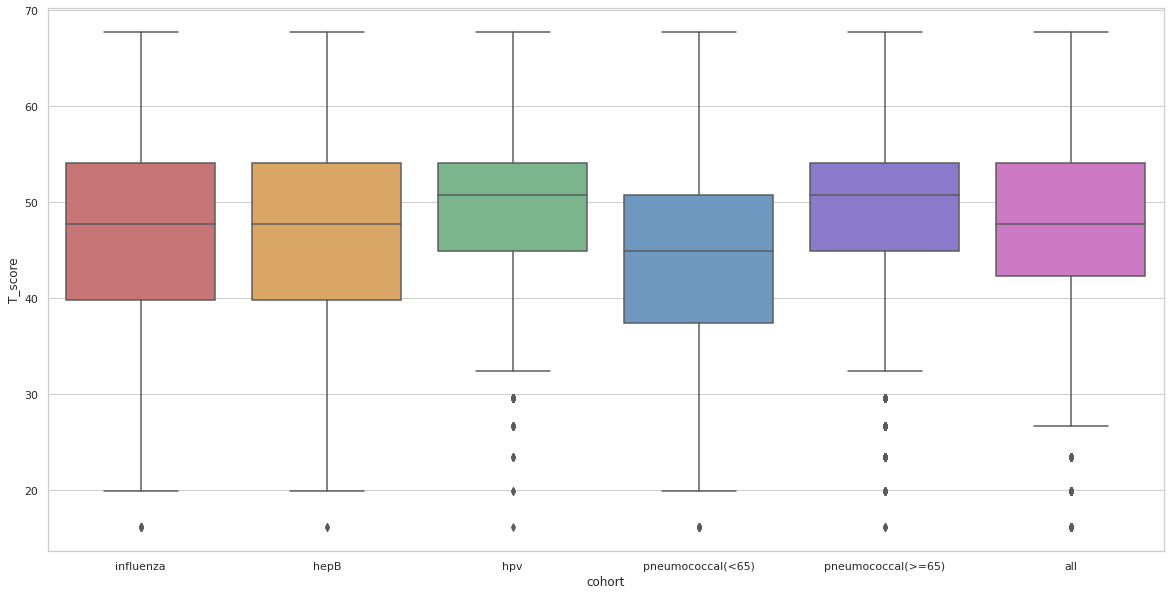

In [34]:
# Box plot for physical T scores
plt.figure(figsize=(20, 10))
print("Physical T Scores")
plot = create_box_plot_for_T_score(physical_t_scores_dict)

Physical SE Scores


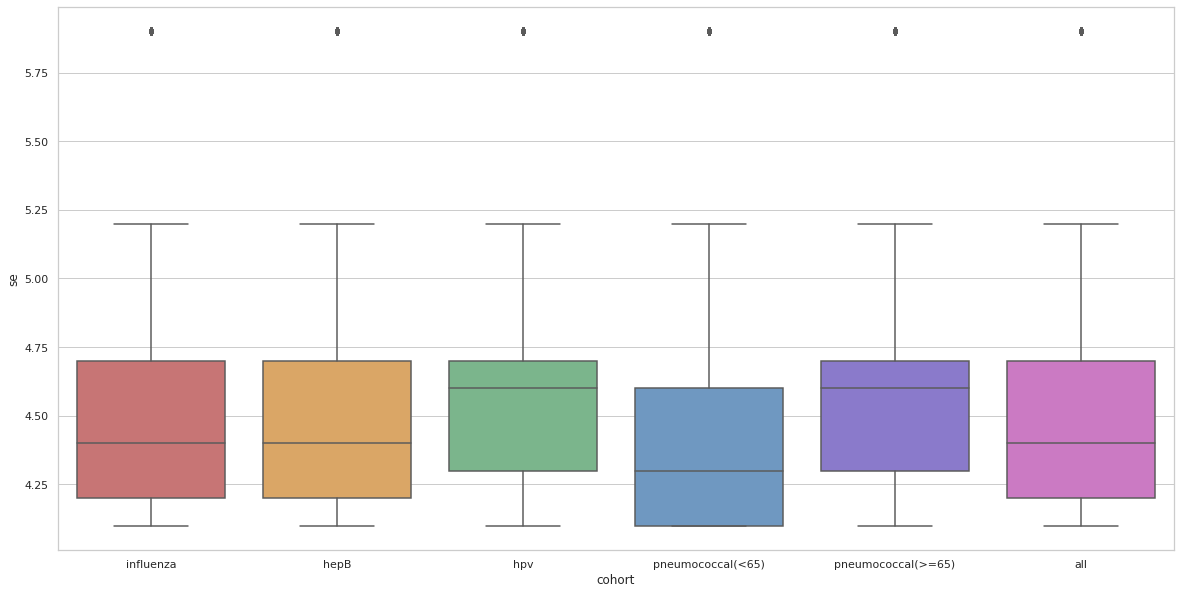

In [35]:
# Box plot for physical SE scores
plt.figure(figsize=(20, 10))
print("Physical SE Scores")
plot = create_box_plot_for_SE_score(physical_se_dict)

In [ ]:
# Box plot for mental T scores
plt.figure(figsize=(20, 10))
print("Mental T Scores")
plot = create_box_plot_for_T_score(mental_t_scores_dict)

In [ ]:
# Box plot for mental SE scores
plt.figure(figsize=(20, 10))
print("Mental SE Scores")
plot = create_box_plot_for_SE_score(mental_se_dict)

### Grouped

In [62]:
# create groupings for physical T-score
def group_physical_t_score(df):
    if (df['T_score']>=58):
        return "Excellent"
    elif 50 <= df['T_score'] < 58:
        return "Very Good"
    elif 42 <= df['T_score'] < 50:
        return "Good"
    elif 35 <= df['T_score'] < 42:
        return "Fair"
    elif df['T_score'] < 35:
        return "Poor"
    
grouped_physical_t_scores = dict()
for (name, this_df) in physical_t_scores_dict.items():
    df = this_df.copy()
    df['group'] = df.apply(lambda row: group_physical_t_score(row), axis=1)
    grouped_physical_t_scores[name] = df
#     display(df)

In [107]:
# create groupings for mental T-score
def group_mental_t_score(df):
    if (df['T_score']>=57):
        return "Excellent"
    elif 48 <= df['T_score'] < 57:
        return "Very Good"
    elif 40 <= df['T_score'] < 48:
        return "Good"
    elif 29 <= df['T_score'] < 40:
        return "Fair"
    elif df['T_score'] < 29:
        return "Poor"
    
grouped_mental_t_scores = dict()
for (name, this_df) in mental_t_scores_dict.items():
    df = this_df.copy()
    df['group'] = df.apply(lambda row: group_mental_t_score(row), axis=1)
    grouped_mental_t_scores[name] = df
#     display(df)

In [117]:
# grouped physical T-scores
cohort_sizes={"influenza":15346,
             "hepB":6323,
            "hpv":2125,
            "pneumococcal(<65)":15217,
            "pneumococcal(>=65)":15100,
            "all":315297
             }
output_dfs = []
for (name, this_df) in grouped_physical_t_scores.items():
    unique_patients = len(this_df.person_id.unique())
    df = pd.DataFrame(this_df['group'].value_counts())
    df.columns = ["count"]
    total_answers = df['count'].sum()
    df.loc["Unique Patients"] = unique_patients
    df.loc['Total Answers'] = total_answers
    df.loc['Cohort Size'] = cohort_sizes[name]
    
    
#     df = add_cohort_size_row(df)
#     display(df)
    df.loc["Missing"] = cohort_sizes[name] - unique_patients
#     display(df)

    df['percent'] = df['count'] * 100/ cohort_sizes[name]
    df['percent'] =  df['percent'].map('({:,.1f}%)'.format)
    df['combined'] = df['count'].astype(str) + " " + df['percent'].astype(str)
    df = df[['combined']]
    df.loc['Cohort Size'] = cohort_sizes[name]
    df.columns =[name]
    output_dfs.append(df.stack())
    
grouped_physical_t_scores_summary = pd.concat(output_dfs, axis=0).unstack() 
grouped_physical_t_scores_summary = grouped_physical_t_scores_summary[grouped_physical_t_scores.keys()]
grouped_physical_t_scores_summary = grouped_physical_t_scores_summary.reindex(['Cohort Size', 'Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Missing'])
display(grouped_physical_t_scores_summary)
create_download_link(grouped_physical_t_scores_summary, "grouped_physical_t_scores_summary", "grouped_physical_t_scores_summary")


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346,6323,2125,15217,15100,315297
Excellent,1184 (7.7%),487 (7.7%),172 (8.1%),639 (4.2%),1556 (10.3%),24476 (7.8%)
Very Good,5266 (34.3%),2031 (32.1%),810 (38.1%),3584 (23.6%),5991 (39.7%),100172 (31.8%)
Good,3842 (25.0%),1585 (25.1%),533 (25.1%),4112 (27.0%),3776 (25.0%),75713 (24.0%)
Fair,1768 (11.5%),757 (12.0%),172 (8.1%),2442 (16.0%),1429 (9.5%),33140 (10.5%)
Poor,1727 (11.3%),749 (11.8%),148 (7.0%),2762 (18.2%),1023 (6.8%),31548 (10.0%)
Missing,1559 (10.2%),714 (11.3%),290 (13.6%),1678 (11.0%),1325 (8.8%),50248 (15.9%)


In [118]:
# grouped mental T-scores
cohort_sizes={"influenza":15346,
             "hepB":6323,
            "hpv":2125,
            "pneumococcal(<65)":15217,
            "pneumococcal(>=65)":15100,
            "all":315297
             }
output_dfs = []
for (name, this_df) in grouped_mental_t_scores.items():
    unique_patients = len(this_df.person_id.unique())
    df = pd.DataFrame(this_df['group'].value_counts())
    df.columns = ["count"]
    total_answers = df['count'].sum()
    df.loc["Unique Patients"] = unique_patients
    df.loc['Total Answers'] = total_answers
    df.loc['Cohort Size'] = cohort_sizes[name]
    
    
#     df = add_cohort_size_row(df)
#     display(df)
    df.loc["Missing"] = cohort_sizes[name] - unique_patients
#     display(df)

    df['percent'] = df['count'] * 100/ cohort_sizes[name]
    df['percent'] =  df['percent'].map('({:,.1f}%)'.format)
    df['combined'] = df['count'].astype(str) + " " + df['percent'].astype(str)
    df = df[['combined']]
    df.loc['Cohort Size'] = cohort_sizes[name]
    df.columns =[name]
    output_dfs.append(df.stack())
    
grouped_mental_t_scores_summary = pd.concat(output_dfs, axis=0).unstack() 
grouped_mental_t_scores_summary = grouped_mental_t_scores_summary[grouped_mental_t_scores.keys()]
grouped_mental_t_scores_summary = grouped_mental_t_scores_summary.reindex(['Cohort Size', 'Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Missing'])
display(grouped_mental_t_scores_summary)
create_download_link(grouped_mental_t_scores_summary, "grouped_mental_t_scores_summary", "grouped_mental_t_scores_summary")


,influenza,hepB,hpv,pneumococcal(<65),pneumococcal(>=65),all
Cohort Size,15346,6323,2125,15217,15100,315297
Excellent,1414 (9.2%),603 (9.5%),170 (8.0%),940 (6.2%),1956 (13.0%),24169 (7.7%)
Very Good,5670 (36.9%),2201 (34.8%),788 (37.1%),4694 (30.8%),6041 (40.0%),108586 (34.4%)
Good,3378 (22.0%),1452 (23.0%),533 (25.1%),3972 (26.1%),2563 (17.0%),72315 (22.9%)
Fair,1873 (12.2%),908 (14.4%),324 (15.2%),2632 (17.3%),888 (5.9%),39726 (12.6%)
Poor,284 (1.9%),154 (2.4%),53 (2.5%),452 (3.0%),62 (0.4%),6304 (2.0%)
Missing,2727 (17.8%),1005 (15.9%),257 (12.1%),2527 (16.6%),3590 (23.8%),64197 (20.4%)


In [ ]:
#%%script false --no-raise-error

# Comorbidities for Cohorts

## Import Datasets

In [25]:
import_df("influenza_comorbidities")
import_df("hepB_comorbidities")
import_df("hpv_comorbidities")
import_df("pneumococcal_under_65_comorbidities")
import_df("pneumococcal_65_and_over_comorbidities")
import_df_hdf("all_patients_comorbidities")

[INFO] influenza_comorbidities.h5 is successfully downloaded into your working space
h5 file not found
[INFO] influenza_comorbidities.csv is successfully downloaded into your working space


FileNotFoundError: [Errno 2] No such file or directory: 'influenza_comorbidities.csv'

## Analyze Datasets

In [ ]:
# Aggregate comorbidities dataframes
comorbidities_dfs = [influenza_comorbidities, hepB_comorbidities,
                          hpv_comorbidities, pneumococcal_under_65_comorbidities, 
                          pneumococcal_65_and_over_comorbidities
                          , all_patients_comorbidities
                         ]
comorbidities_df_names = ["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)"
                          , "all"
                         ]
comorbidities_dict = {
    "influenza": influenza_comorbidities, 
    "hepB" : hepB_comorbidities, 
    "hpv": hpv_comorbidities, 
    "pneumococcal(<65)" : pneumococcal_under_65_comorbidities, 
    "pneumococcal(>=65)": pneumococcal_65_and_over_comorbidities,
    "all" : all_patients_comorbidities
}

column_names = [
    "hypertension", "heart_failure", "ischemic_heart", "atrial_fibrillation", "hyperlipidemia",
    "stroke", "arthritis", "asthma", "autism", 'cancer', "chronic_kidney_disease", "chronic_pulmonary_disease",
    "alzheimers", "depression", "diabetes", "hepatitis", "HIV", "osteoporosis", "schizophrenia", "substance_abuse"
]
# change_ids_to_str(with_comorbidities_dfs, ["person_id", "question_concept_id", "answer_concept_id"])
# with_comorbidities_dfs

In [ ]:
len(hepB_comorbidities.person_id.unique())

In [ ]:
# move row of index to top of df
def move_row_to_top(df, index_name):
    df["new"] = range(1,len(df)+1)
    df.loc[index_name,'new'] = 0
    return df.sort_values("new").drop('new', axis=1)

In [ ]:
# get top comorbidities per cohort
output_dfs = []
for name, df in comorbidities_dict.items():
#     print(name, len(df))
    this_df = df[column_names].astype(int).sum().to_frame('patient_count').sort_values("patient_count", ascending=False)
    this_df.reset_index(inplace=True)
    this_df['percent'] = this_df['patient_count'] * 100 / len(df)
    this_df['percent'] =  this_df['percent'].map('({:,.1f}%)'.format)
    this_df['combined'] = this_df['index'].astype(str) + " : " + this_df['patient_count'].astype(str) + " " +this_df['percent'].astype(str)
    this_df = this_df[['combined']]
    this_df.columns =[name] 
    output_dfs.append(this_df.stack())
    
top_comorbidities = pd.concat(output_dfs, axis=0).unstack() 
# display(top_comorbidities)
top_comorbidities =  top_comorbidities[comorbidities_df_names]
top_comorbidities.loc['Total'] = [len(df.index) for df in comorbidities_dict.values()]
top_comorbidities = account_for_missing(top_comorbidities, "Total", "Missing Patients")
top_comorbidities = move_row_to_top(top_comorbidities, "Missing Patients")

# move total to top
top_comorbidities = move_row_to_top(top_comorbidities, 'Total')
display(top_comorbidities)
create_download_link (top_comorbidities, "Download Top Comorbidities as CSV", "top_comorbidities.csv")

In [ ]:
# Table for comorbidities
pd.options.display.float_format = "{:.2f}".format

comorbidities_lists = [df.total_comorbidities.astype(int).describe().tolist() for df in comorbidities_dfs]
comorbidities_columns = [name + "_comorbidities" for name in comorbidities_df_names ]
comorbidities_summary = pd.DataFrame(list(zip(*comorbidities_lists)), columns=comorbidities_columns)
comorbidities_summary.set_index(influenza_comorbidities.total_comorbidities.astype(int).describe().index, inplace=True)
account_for_missing(comorbidities_summary)
display(comorbidities_summary)
create_download_link (comorbidities_summary, "Download comorbidities_summary as CSV", "comorbidities_summary.csv")

In [7]:
# get comorbidities per cohort (for dummy tables)
output_dfs = []
for name, df in comorbidities_dict.items():
#     print(name, len(df))
    this_df = df[column_names].astype(int).sum().to_frame('patient_count').sort_values("patient_count", ascending=False)
#     display(this_df)
#     if name=="all":
#         print(this_df.index)
#     this_df.reset_index(inplace=True)
    this_df['percent'] = this_df['patient_count'] * 100 / len(df)
    this_df['percent'] =  this_df['percent'].map('({:,.1f}%)'.format)
    this_df['combined'] = this_df['patient_count'].astype(str) + " " +this_df['percent'].astype(str)
    this_df = this_df[['combined']]
    this_df.columns =[name] 
#     display(this_df)
    this_df = this_df.reindex(['hypertension', 'hyperlipidemia', 'arthritis', 'depression', 'diabetes',
           'substance_abuse', 'asthma', 'chronic_kidney_disease', 'hepatitis',
           'ischemic_heart', 'chronic_pulmonary_disease', 'cancer', 'osteoporosis',
           'stroke', 'heart_failure', 'atrial_fibrillation', 'schizophrenia',
           'HIV', 'alzheimers', 'autism'], fill_value="0 (0.0%)")
    output_dfs.append(this_df.stack())
    
top_comorbidities = pd.concat(output_dfs, axis=0).unstack() 
# display(top_comorbidities)
top_comorbidities =  top_comorbidities[comorbidities_df_names]
top_comorbidities= top_comorbidities.reindex(['hypertension', 'hyperlipidemia', 'arthritis', 'depression', 'diabetes',
           'substance_abuse', 'asthma', 'chronic_kidney_disease', 'hepatitis',
           'ischemic_heart', 'chronic_pulmonary_disease', 'cancer', 'osteoporosis',
           'stroke', 'heart_failure', 'atrial_fibrillation', 'schizophrenia',
           'HIV', 'alzheimers', 'autism'], fill_value="0 (0.0%)")
top_comorbidities.loc['Total'] = [len(df.index) for df in comorbidities_dict.values()]
# top_comorbidities = account_for_missing(top_comorbidities, "Total", "Missing Patients")
# top_comorbidities = move_row_to_top(top_comorbidities, "Missing Patients")
# move total to top
top_comorbidities = move_row_to_top(top_comorbidities, 'Total')
display(top_comorbidities)
create_download_link (top_comorbidities, "Download Top Comorbidities as CSV", "top_comorbidities.csv")

NameError: name 'comorbidities_dict' is not defined

In [ ]:
# Aggregate comorbidities dataframes
comorbidities_dict = {"influenza": influenza_comorbidities, 
                      "hepB": hepB_comorbidities,
                      "hpv": hpv_comorbidities, 
                      "pneumococcal(<65)":pneumococcal_under_65_comorbidities, 
                      "pneumococcal(>=65)":pneumococcal_65_and_over_comorbidities,
                      "all":all_patients_comorbidities
                     }

In [ ]:
comorbidities_dict["influenza"]

In [ ]:
# Define box plot func for comorbidity counts

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(cohort_colors_list))
#sns.set_palette("flare")

def create_box_plot_for_comorbidities(df_dict):
    combined_df = pd.DataFrame(columns=['number_of_comorbidities', 'cohort'])
    for k, v in df_dict.items():
        temp = v[['total_comorbidities']].copy()
        temp.rename({'total_comorbidities':'number_of_comorbidities'}, axis=1, inplace=True)
        temp['number_of_comorbidities'] = temp['number_of_comorbidities'].astype(int)
        #print(temp)
        temp['cohort'] = k
        combined_df = combined_df.append(temp, ignore_index=True)
    #print(combined_df)
    box = sns.boxplot(y='number_of_comorbidities', x='cohort', data=combined_df)
    #return box

In [ ]:
# Box plot for comorbidity counts in each cohort
create_box_plot_for_comorbidities(comorbidities_dict)

In [ ]:
# Table for distribution of comorbidity counts
output_dfs = []
for k,df in comorbidities_dict.items():
    this_df = df.copy()
    unique_pts = len(this_df.person_id.unique())
    total = len(this_df.index)
    counts = this_df.groupby("total_comorbidities").size().to_frame("patients")
    counts.index = counts.index.astype(int)
    counts.sort_index(inplace=True, axis=0)
#     display(counts)
    counts['percent'] = counts['patients'] * 100 / total
    counts['percent'] =  counts['percent'].map('({:,.1f}%)'.format)
    counts['combined'] = counts['patients'].astype(str) + " " + counts['percent'].astype(str)
    counts = counts[['combined']]
#     counts.loc['Unique Patients'] = unique_pts
    counts.columns = [k]
    output_dfs.append(counts.stack())
    
    
comorbidities_count_dist = pd.concat(output_dfs, axis=0).unstack()
comorbidities_count_dist.fillna("0 (0.0%)",inplace=True )
comorbidities_count_dist.loc[19] = "0 (0.0%)"
comorbidities_count_dist.loc[20] = "0 (0.0%)"
comorbidities_count_dist = comorbidities_count_dist[ comorbidities_dict.keys()]
print("comorbidity counts")
comorbidities_count_dist = add_cohort_size_row(comorbidities_count_dist)
# comorbidities_count_dist = account_for_missing(comorbidities_count_dist, "Unique Patients", "Missing")
display(comorbidities_count_dist)
create_download_link (comorbidities_count_dist, "Download Comorbidities Count Distrib. as CSV", "comorbidities_count_dist.csv")

In [ ]:
# Define function to create age histograms
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("white")
def create_comorbidity_count_histogram(df, label, col_name, ax):
#     bin_max = max(85, df[col_name].max())
#     bins = [0, 18, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 80, bin_max]
    bins = range(0, 21)
    color = cohort_colors[label]
    dp =  sns.distplot(df[col_name], bins=bins,
             kde=True, color=color, hist_kws={"alpha": 0.8}, axlabel = label + f" ({col_name})",
                        kde_kws={"lw": 3, "label": "KDE", "kernel": "tri", "bw":1},
                        ax=ax)
    dp.set_xticks(bins)
    dp.yaxis.grid(True)
#     dp.xaxis.grid(True)
    return dp

# Create histograms for comorbidities count distribution
width = 2
# height = math.ceil(len(vac_demographic_dfs) / 2) 
height = 3
fig, axes = plt.subplots(height, 2, figsize=(20, 20))
i = 0
for key, df in comorbidities_dict.items():
    create_comorbidity_count_histogram(df, key, "total_comorbidities", axes[i // 2, i % 2])
    i += 1

In [ ]:
# Define function to create combined KDES
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("white")
def create_comorbidity_count_histogram(df, label, col_name, ax):
#     bin_max = max(85, df[col_name].max())
#     bins = [0, 18, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 80, bin_max]
    bins = range(0, 21)
    color = cohort_colors[label]
    dp = sns.distplot(df[col_name], bins=bins,
             kde=True, color=color, hist_kws={"alpha": 0.8}, axlabel = label + f" ({col_name})",
                        kde_kws={"lw": 3, "label": "KDE", "kernel": "tri", "bw":1},
                        ax=ax)
    dp.set_xticks(bins)
    dp.yaxis.grid(True)
#     dp.xaxis.grid(True)
    return dp

# fig, axes = plt.plot(20, 20)
ax = plt.gca()
i = 0
label = "total_comorbidities"
bins = range(0, 21)
for key, df in comorbidities_dict.items():
    color = cohort_colors[key]
    sns.distplot(df[label], bins=bins, hist=False,
             kde=True, color=color, hist_kws={"alpha": 0.6, "histtype":"step", "lw":3, "density":True}, axlabel = label,
                        kde_kws={"lw": 3, "label": key, "kernel": "tri", "bw":1, "cut":0}, ax=ax)
#     display(df)
#     break;
    i += 1

plt.rcParams["figure.figsize"] = (20,10)
ax.set_xticks(bins)
ax.yaxis.grid(True)

In [ ]:
#%%script false --no-raise-error

# Top Condition Codes for Comorbidities

## Download Dataset

In [ ]:
import_df_hdf('all_conditions_with_comorbidity_limited')

## Get Top Codes via CSV Download

In [ ]:
# create download links
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [ ]:
# make copy
all_cohort_comorbidities = all_conditions_with_comorbidity_limited.copy()
# remove extra columns
group_all_comorbidities = all_cohort_comorbidities[['person_id', 'comorbidity', 'condition_name', 'condition_concept_id']]
removed_duplicates = group_all_comorbidities.drop_duplicates()

In [ ]:
# top condition codes for all comorbidities
def get_top_condition_codes(group):
    top_conditions = group.groupby(['comorbidity', 'condition_concept_id', 'condition_name']).size().to_frame('patient_count')
    top_conditions= top_conditions.sort_values('patient_count', ascending=False)
    return top_conditions

get_top_condition_codes(removed_duplicates).head(20)

In [ ]:
output_dfs = {}
for comorbidity, group in removed_duplicates.groupby('comorbidity'):
    top_conditions = group.groupby(['comorbidity', 'condition_concept_id', 'condition_name']).size().to_frame('patient_count')
    top_conditions= top_conditions.sort_values('patient_count', ascending=False)
    output_dfs[comorbidity] = top_conditions

In [ ]:
# create links for top condition codes for each comorbidity
for comorbidity, df in output_dfs.items():
    html = create_download_link(df, comorbidity, filename=f"{comorbidity}.csv")
    display(html)

In [ ]:
# End of Section 10
#%%script false --no-raise-error

# Doses for HepB and HPV

## Import Datasets

In [ ]:
import_df("hpv_doses")
import_df("hepB_doses")

In [ ]:
doses_dict = {
    "hpv" :hpv_doses,
    "hepB": hepB_doses
}

In [ ]:
hpv_doses

In [ ]:
# Table for counts
output_dfs = []
for k,this_df in doses_dict.items():
    total = len(this_df.index)
    counts = this_df.groupby("doses").size().to_frame("patients")
    counts.index = counts.index.astype(int)
    counts.sort_index(inplace=True, axis=0)
#     display(counts)
    counts['percent'] = counts['patients'] * 100 / total
    counts['percent'] =  counts['percent'].map('({:,.1f}%)'.format)
    counts['combined'] = counts['patients'].astype(str) + " " + counts['percent'].astype(str)
    counts = counts[['combined']]
    counts.columns =[k + "_doses_count"]
    counts.loc['total'] = total
    output_dfs.append(counts.stack())
    
    
doses = pd.concat(output_dfs, axis=0).unstack()
doses.fillna("0 (0.0%)",inplace=True )
#doses.loc[19] = "0 (0.0%)"
#doses.loc[20] = "0 (0.0%)"
# doses
account_for_missing(doses, "total")

In [ ]:
create_download_link(doses)

# Correlation


In [ ]:
import_df("influenza_demographics")
import_df("hepB_demographics")
import_df("hpv_demographics")
import_df("pneumococcal_demographics_under_65")
import_df("pneumococcal_demographics_65_and_over")
import_df("all_patients_demographics")

# Prepare dataframes for visualization
demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                   pneumococcal_demographics_65_and_over, all_patients_demographics]
vac_demographic_dfs = [influenza_demographics, hepB_demographics, hpv_demographics, pneumococcal_demographics_under_65, 
                            pneumococcal_demographics_65_and_over]
demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)", "all"]
vac_demographic_df_names=["influenza", "hepB", "hpv", "pneumococcal(<65)", "pneumococcal(>=65)"]

change_cols_to_int(vac_demographic_dfs, ["age_at_vaccination"])
change_cols_to_int(demographic_dfs, ["age_in_2018"])

In [ ]:
df = influenza_demographics.copy()
df = df[df['race']=="Black or African American"]
df

In [ ]:
df.race.value_counts()